<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="220"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="250"/>  

# <center>Programming for Data Analysis 2019 Project: Simulating Real World Data</center>  #

***
**Module Name**: Programming for Data Analysis  
**Module Number**: 52465  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
***

**Problem statement**  
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.  

We suggest you use the numpy.random package for this purpose.  

Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.  
* Investigate the types of variables involved, their likely distributions, and their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.  

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 

***

# Table of Contents #
1. [Introduction](#intro)  
1.1 [Helper Functions](#help)
2. [Dataset](#dataset)  
2.1 [Cell Line](#cell_line)  
2.2 [Bioreactor Size](#brSize)  
2.3 [Average Temperature](#temp)  
2.4 [Dissolved Oxygen](#do)  
2.5 [Culture type](#culture)  
2.6 [Peak Viable Cell Density](#cell_dens)  
2.7 [Processing Time](#hours)  
2.8 [No of alarms](#alarms)  
2.9 [Yield](#yield)  
2.10 [Net worth of batch](#worth)
3. [Finishing Off the Dataset](#finish)
4. [Describe New Dataset](#describe)  
4.1 [Cell Line](#cl)  
4.2 [Bioreactor Size](#bs)  
4.3 [Average Temperature](#t)  
4.4 [Dissolved Oxygen](#o)  
4.5 [Culture type](#c)  
4.6 [Peak Viable Cell Density](#cd)  
4.7 [Processing Time](#h)  
4.8 [No of alarms](#a)  
4.9 [Yield](#y)  
4.10 [Net worth of batch](#w)
5. [Conclusion](#conclusion)
6. [References](#refs)

 ## <a name="intro"></a>1. Introduction ## 
For my data simulation project I have chosen the production of biopharmaceuticals products. Biopharmaceutical production is achieved by manipulating living cells to produce a medicinal product. The cells themselves may be microbial e.g. bacteria, fungal or yeast cells, or mammalian e.g. Chinese Hamster Ovary cells, insect or plant cells. In general the more complex the cell, the more complex the product that cell can produce. 

<img align="right" src="images/bioreactor.png" alt="bioreactor" width="475"/> A very common type of biopharmaceutical is the monoclonal antibody (mAb). Naturally occurring antibodies are produced in the body as part of our immunological defense systems. Whenever we get a cough or cold, or indeed anything more serious, our bodies will produce antibodies to target whatever is causing the illness. This may be a bacterium, _e.g._ Strep throat caused by _Streptococcus pyogenes,_ a virus, in the case of a cold or flu, some foreign matter _e.g._ pollen which will result in hayfever or even the bodies own cells when they become aged or damaged. Because antibodies may be made to combat any substance that enters the body, they make ideal candidates to harness for therapeutic purposes.  

Monoclonal antibodies have been produced to treat a huge amount of diseases _e.g._ as chemotherapeutics and to alleviate the symptoms of many autoimmune diseases such as arthritis, Crohns disease _etc_. In general, the monoclonal antibodies are very high net worth drugs and quite complex in size, nature and in their manufacture. As a result only the more complex cells can make them _i.e._ mammalian cells. 

Microbial cells are more suited to the culturing process and have been long used to produce the like of antibiotics like penicillin. Microbial cells are not capable of producing the complex mAb, but have been used to produce mAb fragments which are also used for therapeutic purposes.

To make a biopharmaceutical a single cell that is good at producing the product required, _e.g._ the mAb, is cloned repeatedly. This cloned cell is grown in a vessel called a bioreactor (pictured on the right [[7]](#7)). The cells are grown and conditions maintained to encouraged them to produce the biopharmaceutical. The contents of the bioreactor are then removed, the medicinal product _e.g._ antibody, is extracted and purified to produce the final biopharmaceutical product.  

For the purposes of the dataset simulation, I am looking at the growth and production of the biopharmaceutical only. I am ignoring the downstream harvesting, protein capture and polishing steps. The data I have initially chosen to simulate for this project are:  
<img align="right" src="images/biopharmaceutical.jpg" alt="bioreactor" width="350"/> 
* Cell line
* Bioreactor Size  
* Average Temperature   
* Dissolved Oxygen  
* Peak Viable Cell Density  
* Processing Hours  
* Culture type  
* No of alarms  
* Yield  
* Net worth of batch  

A search of such a dataset yielded no similar results. Any published material refers only to a specific cell / production process [[17](#17),[20-24](#20)]. This simulated dataset refers to multiple cell types producing multiple products through a variety of tec of varying worth.  I will use the scipy stats and numpy random package as an aid to the data simulation [[1](#1)], and will complete the assignment in this Juptyer Notebook [[2](#2)].

### <a name="help"></a>1.1 Helper Functions  

There are a number of repetitive checks / transformations need to be done to the data being generated. This section houses any functions we need to perform these tasks. Many of these are due to the fact that the data being generated is random, so without using the seed function, we cannot predict exactly where the data will fall.  

These functions include:
* setLimits - to ensure that hard minimum or maximum values are held irrespective of data generated  
* get_truncated_normal - where a normal distribution is required but there are hard limits beyond which the values cannot dip or exceed. For example you cannot have a negative bioreactor size, DO cannot exceed 6.7mg/L at 37degC etc.

Before we do anything however, we need first import the packages required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting and as a basis for seaborn
from scipy import stats # Calculation of z-scores
from scipy.stats import truncnorm # for creating truncated normal distributions 

import pandas_profiling # For profiling our simulated dataset
import seaborn as sns # For plotting out new dataset
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 6] # Setting the plot size

In [2]:
# This function resets the minimum and maximum values
# If there are hard set limits eg size of bioreactor cannot be negative, DO level cannot be above 6.7 etc
# This does over-ride the normal or whatever distribution chosen, 
# but it gets rid of nonsense values and it is a simulation ...
def setLimits(attList, minReq, maxReq, minVal, maxVal):
    # Create a new list to return the corrected values
    newList = []
    # Loop through each item in the list
    for att in attList:
        # If we are checking for minimum values
        # And the item is below the min value
        if minReq and att < minVal:
            # Reset to be minVal
            att = minVal
        # If we are checking for maximum values
        # And the item is above the max value    
        if maxReq and att > maxVal:
            # Reset to be the maxVal
            att = maxVal
        # Create a new list with corrected values
        newList.append(att)
    # Return the new list
    return newList

In [3]:
# This is to create a normal distribution where there are defined limits [24]
# If there are hard set limits eg size of bioreactor cannot be negative, DO level cannot be above 6.7 etc
# This does over-ride the normal or whatever distribution chosen, 
# but it gets rid of nonsense values and it is a simulation ...
def get_truncated_normal(mean=0, sd=1, low=0, upp=10, size = 100):
    return truncnorm.rvs(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd, size = size)

## 2. <a name="dataset"></a>The Dataset

Of all the parameters I have chosen, the most influential of all is the cell type. There are three possible cell types and as almost every variable is dependent on the kind of cells used, the plan is to create three minidatasets which I will combine at the end. Each of these dataset will be 100 rows long.  

### <a name="cell_line"></a>2.1 Cell Line 
This is the type of used to produce the antibody. While there are many types of cells utilised in biopharmaceutical production, for the purposes of this project I am ploying categorical data. The cell type may be -

<img align="right" src="images/CHO.png" alt="Chinese Hamster Ovary Cells" width="380"/> 
* Microbial cells _e.g. E. coli._ - being unicellular, these cells are the easiest to grow, will produce a lot of product, but can only produce basic proteins. Simple fungal fermenations fall into this category too. They do not need a complex support system of organs to enable them to grow and produce the product. Microbial cell culture is known as fermentation and happens in a fermenter rather than a bioreactor. For ease of reference throughout this notebook when we refer to cell culture, we also include microbial fermentation too and similarly, bioreactor refers also to fermenters.  
* Mammalian cell (_e.g._ CHO) - Chinese Hamster Ovary cells (pictured on right [[8]](#8)) are frequently used in biopharmaceutical processing. They can produce complicated proteins but are harder to grow in vitro. Mammalian cells are used to being part of a larger organism that has specialised organs to look after for example waste disposal _etc._. They also rely on other organs for physical protection and anchorage _e.g._ bones and skin. Mammalian cells do not adapt well to being on their own in a bioreactor and as a result will grow much slower and be more susceptible to damage than microbial cells.  
* Humanised CHOs - As the body recognises CHO-produced proteins as non-human, they elicit an immune response. CHOs may be genetically manipulated to produce humanised proteins which are better accepted by the body. This genetic manipulation further destabilises the cells however, making them more difficult again to grow.  

This is a really important feature as many of the following attributes depend on the cell type. In general, the microbial cell line is more robust, mammalian (CHO) less so, and to a lesser extent the mammalian producing humanised protein even less so. For now, I will evenly split the sample size into three and assume there are equal number of each.

In [4]:
data = ["Microbial"]*100
dfMicro = pd.DataFrame(data, columns = ['cell_line']) 
data = ["CHO"]*100
dfMam = pd.DataFrame(data, columns = ['cell_line']) 
data = ["vCHO"]*100
dfHum = pd.DataFrame(data, columns = ['cell_line']) 

# Create set of all three datasets
datasets = [dfMicro, dfMam, dfHum]
dsNames = ["Microbial", "Mammalian", "Humanised"]

### <a name= brSize></a>2.2 Size of bioreactor
THe size of the bioreactor The larger the bioreactor, the greater the amount of product produced. It takes more time for the cells to acclimatise to the bioreactor, particularly the mammalian cells (CHO and humanised CHO). For the purposes of the data simulation it is assumed there will be a uniform distribution of the bioreator sizes.


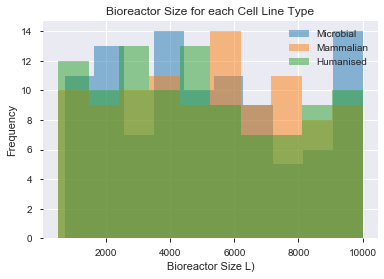

In [5]:
# Start with Bioreactor Size
for dataset in datasets:
    # This will be a uniformly distributed range of sizes from 500L to 10000L 
    brSize = 100 * np.random.randint(5, 101, 100)
    dataset["br_size"] = brSize
    plt.hist(brSize, alpha = 0.5)

plt.xlabel("Bioreactor Size L)")
plt.ylabel("Frequency")
plt.title("Bioreactor Size for each Cell Line Type")
plt.legend(dsNames)

### <a name="temp"></a>2.3 Average Temperature Reading  
There are a number of parameters that are controlled and monitored as part of the cultivation of cells. One such parameter is the temperature. This is controlled via a control system (DCS - Distributed Control System, or PLC - Programmable Logic Controller) [[13](#13)]. While the temperature is monitored and controlled throughout its cultivation time, it is taken for this dataset to be the mean throughout the process. This will be simulated to be a normal distributed attribute. The microbial cell lines have a good tolerance for temperature, while the mammalian cells do not. Mammalian cells are used to specific organs controlling the temperature of the body, _e.g._ blood, skin, kidneys _etc._ and have no cellular mechanism to do so on their own. As a result mammalian cells are much more susceptible to temperature fluctuations [[3](#3)].  

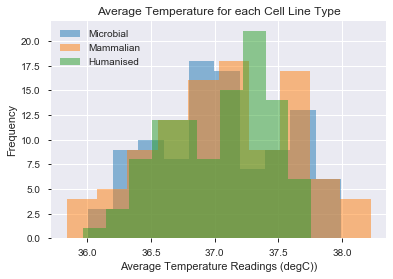

In [6]:
# Simulate Average Temperature Readings
mean_temp = 37.0
std_temp = 0.5
for dataset in datasets:
    # This will be a normally distributed range with a mean of 37.0 degC 
    temp = np.random.normal(mean_temp, std_temp, 100)
    dataset["avg_temp"] = temp.round(1)
    plt.hist(temp, alpha = 0.5)
plt.xlabel("Average Temperature Readings (degC))")
plt.ylabel("Frequency")
plt.title("Average Temperature for each Cell Line Type")
plt.legend(dsNames)

In [7]:
# Just a quick check on our dfs to see how they are coming along
dfMicro.sample(5)
#dfMam.head()
#dfHum.head()

cell_line  br_size  avg_temp
8   Microbial     4000      36.9
81  Microbial     3800      37.6
41  Microbial     1000      37.7
54  Microbial     2200      36.7
13  Microbial     1700      36.8

### <a name="do"></a>2.4 Dissolved Oxygen  
Like the average temperature reading, the dissolved oxygen (DO) is continuously monitored throughout the process by the control system and the mean value simulated here. Again like the temperature, the microbial cells are easier to adapt to non-optimal DO levels [[5]](#5).  

The DO data is assumed to follow a normal distribution, but one with hard limits. At 37$^{\circ}$C it is physically impossible for there to be a DO content of more than 6.7mg/L. There is also no possibility of a negative DO value. To simulate this data we will use the truncated normal function from scipy using out helper function get_truncated_normal.

To make things more interesting, we are going to make a huge leap here and say that if the DO is too high, it is a sign that air was too vigorously sparged through the bioreactor which would result in cell lysis (breaking apart - death). This is a true phenomenon, but increased O$_2$ levels could also be due to factors other than sparging as well. 

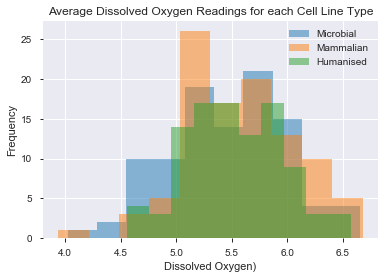

In [8]:
# Simulate Average Dissolved Oxygen Readings
mean_do = 5.5
std_do = 0.5

for dataset in datasets:
    # This will be a normally distributed range of DO averages centred around a mean of 5.0
    # At 37degC the maximum possible DO concentration is 6.7
    # We need to ensure that no value exceeds that maximum     
    do = get_truncated_normal(mean=mean_do, sd=std_do, low=0, upp=6.7, size = 100)
    dataset["avg_do"] = list(np.around(np.array(do),1)) 
    plt.hist(do, alpha = 0.5)

plt.xlabel("Dissolved Oxygen)")
plt.ylabel("Frequency")
plt.title("Average Dissolved Oxygen Readings for each Cell Line Type")
plt.legend(dsNames)

In [9]:
# Just a quick check on our dfs to see how they are coming along
#dfMicro.head()
dfMam.head()
#dfHum.head()

cell_line  br_size  avg_temp  avg_do
0       CHO     3900      37.5     5.2
1       CHO     6100      37.1     5.2
2       CHO     6800      37.6     5.5
3       CHO     4700      37.6     5.8
4       CHO     2600      37.0     5.7

### <a name="culture"></a> 2.5 Culture Type  
The type of processing may be   
* Batch  
* Fed batch  
* Perfusion  

In the order given each type has longer processing times, has an increased yield and may have a small bioreactor volume in the case of perfusion method. For the purposes of data simulation, this is categorical data.  

The traits we will consider for allocation of culture type will be:
* Perfusion bioreactors tend to be smaller that other methods
* Fed-batch is the most common method
* Batch is the least common method 

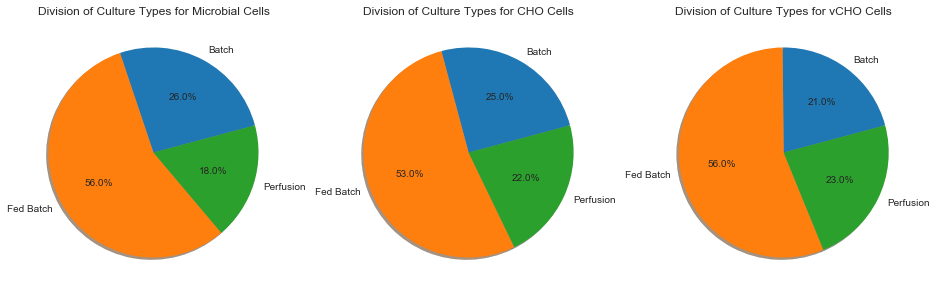

In [10]:
# Simulate different culture types
cultures=["Batch", "Fed Batch", "Perfusion"]
plt.rcParams['figure.figsize'] = [16, 6] # Needed to put this in again!
# Plot both the raw data and the "best fit" lines
i = 1
for dataset in datasets:
    culture=[]
    # iterate over rows with iterrows()[6]
    for index, row in dataset.iterrows():
        # Change the probabilities of the culture type dependent on the bioreactor size
        if row["br_size"] < 2000:
            prob = [0.2, 0.2, 0.6]
        elif row["br_size"] < 6000:
            prob = [0.3, 0.5, 0.2]
        else:
            prob = [0.25, 0.7, 0.05]
        culture.append(np.random.choice(cultures, 1, replace=True, p =prob)[0])
    dataset["culture"] = culture
    
    # Data to plot [9]
    sizes = (dataset[dataset.culture == "Batch"].culture.count(), \
            dataset[dataset.culture == "Fed Batch"].culture.count(), \
            dataset[dataset.culture == "Perfusion"].culture.count(), \
            )
    plt.subplot(1, 3, i)
    plt.pie(sizes, labels=cultures, autopct='%1.1f%%', startangle=15, shadow = True)
    plt.title("Division of Culture Types for " + dataset.cell_line[0] + " Cells")
    i+=1

In [11]:
# Just a quick check on our dfs to see how they are coming along
#dfMicro.head()
#dfMam.head()
dfHum.head()

cell_line  br_size  avg_temp  avg_do    culture
0      vCHO     6100      37.0     5.3  Fed Batch
1      vCHO     4200      37.3     5.1  Fed Batch
2      vCHO     2900      37.6     5.6  Fed Batch
3      vCHO     7700      37.3     5.8  Fed Batch
4      vCHO     6000      37.3     5.2  Fed Batch

### <a name="cell_dens"> </a> 2.6 Peak Viable Cell Density  
This is the maximum live cell density in x $10^6$ cells / ml. This is dependent on the type of cells and culture method used [[4](#4)].  

Batch Systems < Fed-batch systems < Perfusion systems  

and  

Mammalian cells < Microbial cells

Within each of these categorisations the cell density could be assumed to be normally distributed.
4 < 6 < 15

In [12]:
# Simulate Cell Densities

for dataset in datasets:
    # Different standard deviations for microbial cultures - more repeatable
    if dataset.cell_line[0] == "Microbial":
        cd_std = 1
    else:
        cd_std = 2
    cd=[]
    # iterate over rows with iterrows()
    for index, row in dataset.iterrows():
        # Change the mean of the normalised distribution dependent on the culture type
        if row["culture"] == "Batch":
            cd_mean = 4
        elif row["culture"] == "Fed Batch":
            cd_mean = 6
        elif row["culture"] == "Perfusion":
            cd_mean = 15
        # taking the absolute (as there are no negative numbers) and integer value
        # Not using the truncated normal function here as there is no absolute higher limit - just cannot be below zero
        celld = get_truncated_normal(mean=cd_mean, sd=cd_std, low=0, upp=10000000, size = 1)
        
        # Adding a bit about the DO level. If it is at max, reduce the cell density x 25%
        if row.avg_do > 6.5: celld = celld *.75
        
        cd.append(int(celld))
    dataset["cell_density"] = cd
    
# Because microbial cell density is much greater
dfMicro.cell_density = dfMicro.cell_density * 4

**Note**: Using a normal distribution here it is possible some values will equate to cell density of 0. This is a valid measurement and can and does happen particularly if something went wrong in the seeding process.  

A cell density of zero reflects the fact that all cells are non-viable or dead. This may also happen if process conditions were incompatible with cellular processes eg environmental conditions like temperature, agitation speed etc, the addition of toxic substances, the build up of toxins from the cellular process itself or simply an exhaustion of nutrient supply.    

While the reading here is a Peak Cell Density, this is often not continually measured, but via sampling. A peak cell density in any of the above scenarios would be possible.

In [13]:
# Just a quick check on our dfs to see how they are coming along
#dfMicro.head()
dfMam.sample(5)
#dfHum.head()

cell_line  br_size  avg_temp  avg_do    culture  cell_density
9        CHO     4300      36.3     5.7  Fed Batch             5
86       CHO     5300      37.0     5.0      Batch             6
50       CHO     3100      36.0     5.2  Fed Batch             3
66       CHO     9500      36.3     4.7  Fed Batch             7
16       CHO     5900      37.0     5.6  Fed Batch             5

### <a name="hours"></a>2.7 Processing Days
Normal distribution dependent on: 
* cell type  
  - microbial cells requiring much less time due to quicker adaptation and cell growth
  - with mammalian cells requiring much longer to build up a sufficient cell density adapt to a new environment and to grow.
* size of bioreactor
  - the larger the bioreaactor the more seeding steps required to get an optimal cell density to seed the bioreactor. Too few cells in a large volume would equate to a longer total processing time at best and cell death at worst.  
  - we will assume that the actual processing time within the main bioreactor will be approximately equal (normal distribution) among the same cell type and culture method. The bioreactor size will affect only the pre-processing seed preparation steps.
  - 3days (72 hrs) + an additional 2 days (48hrs) for every 1000L bioreactor size + 
* culture type  
  - batch being shorter,  
  - fed batch being longer  
  - perfusion being much longer


Proposed calculation factors:  

| Factor                                | Microbial | Mammalian | Humanised |
|---------------------------------------|-----------|-----------|-----------|
| **Batch / Fed Batch Modes**                                                   |
| Base Seed Days                        | 2         | 3         | 3         |
| Day Increase / 1000L  Bioreactor size | 1         | 2         | 2.3       |
| Days in Bioreactor                    | 3         | 5         | 6         |
| Fed-Batch Multiplier                  | 1.3       | 1.3       | 1.3       |
| **Perfusion**                                                                 |
| Total Time (Days)                     | 20        | 40        | 45        |
| Multiplier for every 500L increase    | 1.1       | 1.2       | 1.2       |

Text(0.5, 1.0, 'Histogram of Processing Time per Cell Line')

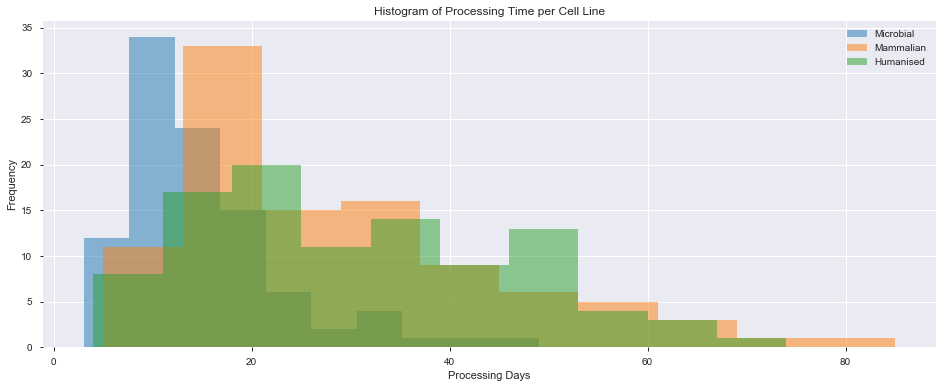

In [14]:
# Simulate Processing Hours
for dataset in datasets:
    days = []
    fb_mult = 1.3
    
    # Set the parameters as per the table above
    if dataset.cell_line[0] == "Microbial":
        seed_base = 2
        seed_inc = 1
        bio = 3
        perf = 20
        perf_mul = 1.1
    elif dataset.cell_line[0] == "CHO":
        seed_base = 3
        seed_inc = 2
        bio = 5
        perf = 40
        perf_mul = 1.2
    else:
        seed_base = 3
        seed_inc = 2.3
        bio = 6
        perf = 45
        perf_mul = 1.2

    # iterate over rows with iterrows()
    for index, row in dataset.iterrows():
        
        # Change the mean of the normalised distribution dependent on the culture type
        if row["culture"] == "Perfusion":
            mean = perf + (row.br_size*perf_mul/500)
        else:
            mean = seed_base + (row.br_size*seed_inc/1000) + bio
            
        # Simulate the values to come from the truncated normalised distribution
        # based on the calculated mean with a standard distribution of the mean / 3
        # We cannot have a negative time, so we will set the minimum to the time in seeding
        time = int(get_truncated_normal(mean=mean, sd=(mean/3), low=seed_base, upp=100000000, size = 1))
        
        # Add a multiplier for the fed-batch processing
        if row.culture == "Fed Batch": time = time * fb_mult
        
        # Append it to the days list
        days.append(time)
    
    # Add a new column "time" to the dataframe
    dataset["time"] = days
    
    # Plot a histgram of it
    plt.hist(days, alpha = 0.5)

# Add the legend and labels
plt.legend(dsNames)
plt.xlabel("Processing Days")
plt.ylabel("Frequency")
plt.title("Histogram of Processing Time per Cell Line")

In [15]:
# Just a quick check on our dfs to see how they are coming along
dfMicro.sample(5)
#dfMam.head()
#dfHum.head()

cell_line  br_size  avg_temp  avg_do    culture  cell_density  time
52  Microbial     5600      37.7     5.6  Perfusion            64  34.0
17  Microbial     4500      37.7     5.4  Fed Batch            20  15.6
70  Microbial     9800      37.9     5.0  Fed Batch            20  15.6
39  Microbial     6200      37.1     5.3  Fed Batch            28  15.6
36  Microbial     4400      37.0     5.9  Fed Batch            24  14.3

In [16]:
# Sanity Check
print("Min. Microbial Time =", dfMicro.time.min())
print("Min. Mammalian Time =", dfMam.time.min())
print("Min. Humanised Time =", dfHum.time.min())

Min. Microbial Time = 3.0
Min. Mammalian Time = 5.0
Min. Humanised Time = 4.0


### <a name="alarms"></a> 2.8  No of Alarms  
The production process is monitored and controlled by an automated control system. This control system will alarm if various parameters fall outside of the acceptable limits. It is a reasonable assumption that the greater the number of alarms during processing would have an adverse effect on the yield.  

From a data simulation perspective, this would be a Poisson distribution of events during the cell growth, over the growth period. But some of the already simulated data will have an effect on the simulated data. An exponential distribution was considered, but as we are more interested in the events themselves rather than the time between events, the Poisson distribution was employed.      
 
Our simulation model will use:  
* The Poisson distribution for alarms with a lambda value of 1.2 alarms per day  
* The number of processing days
* The already simulated processing conditions:  
 - Average temperature 
 - Average DO

We already have simulated some of the data being recorded over the production time, namely temperature and dissolved oxygen. As what we have simulated is the mean temperature and DO, we can assume that those having values further away from the mean will probably have had more alarms generated during processing so therefore we may take this into consideration. To know how far a value is away from the mean we will use the process variables' Z-scores [[11](#11)]. The Z-score is a measure of the number of standard deviations any given reading is away form the mean. To stop the effects of one "good" z-score value negating the effects of one "bad" reading, we will take the maximum of the absolute value of the two z-scores and use that as a multiplier.  

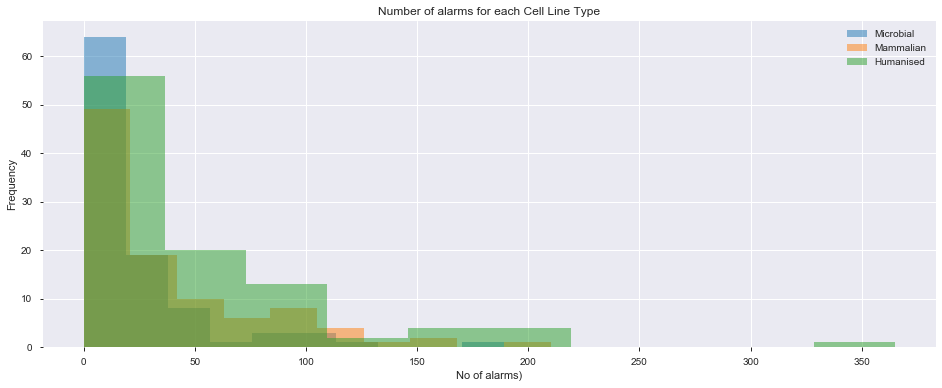

In [17]:
# Simulating the alarms
lam = 1.2 # the frequency of alarms

for dataset in datasets:
    # Alarm calculation - poisson distribution * processing time * max of absolute value of zscores of temperature and do readings
    alarms = (np.random.poisson(lam, 100) * dataset.time * list(map(max, zip(abs(stats.zscore(dataset.avg_temp)),abs(stats.zscore(dataset.avg_do)))))).round(0)
    # Convert the alarm values to integers (because you cannot have a bit of an alarm)
    # and add to the dataset [12]
    dataset["alarm"] = list(map(int, alarms))  
    plt.hist(alarms, alpha = 0.5)

plt.xlabel("No of alarms)")
plt.ylabel("Frequency")
plt.title("Number of alarms for each Cell Line Type")
plt.legend(dsNames)

In [18]:
# Just a quick check on our dfs to see how they are coming along
dfMicro.sample(5)
#dfMam.head()
#dfHum.head()

cell_line  br_size  avg_temp  avg_do    culture  cell_density  time  alarm
26  Microbial     1200      37.7     5.5  Perfusion            52  25.0     34
52  Microbial     5600      37.7     5.6  Perfusion            64  34.0      0
20  Microbial     3800      37.0     5.2      Batch            20   8.0      4
86  Microbial     9900      36.6     5.5  Fed Batch            20  15.6     15
90  Microbial      900      36.7     5.3      Batch            12   5.0      4

In [19]:
# Sanity Check
i = 0
for dataset in datasets:
    print("="*40)
    # See how many are have no alarms
    print("The number of " + dsNames[i] + " cultures without an alarm is:",dataset.alarm[dataset.alarm == 0].count())
    print("")
    i+=1
    # And the top 5 no of alarms of each
    print(dataset.sort_values(by=['alarm'], ascending=False).head())
    print("")

The number of Microbial cultures without an alarm is: 24

    cell_line  br_size  avg_temp  avg_do    culture  cell_density  time  alarm
40  Microbial     9100      37.5     6.1  Perfusion            56  38.0    189
75  Microbial     9700      36.9     4.0  Fed Batch            20  20.8    119
29  Microbial     5700      37.2     4.9  Perfusion            56  33.0    109
93  Microbial     5100      36.0     5.2      Batch            16  12.0    105
95  Microbial     2000      37.7     5.6  Perfusion            60  24.0     97

The number of Mammalian cultures without an alarm is: 31

   cell_line  br_size  avg_temp  avg_do    culture  cell_density  time  alarm
37       CHO     7300      36.5     3.9  Fed Batch             4  31.2    210
61       CHO     9300      37.6     6.0  Perfusion            14  85.0    166
57       CHO     8000      37.5     5.1  Fed Batch             6  57.2    164
62       CHO     1500      38.2     5.7  Perfusion            16  32.0    134
5        CHO      8

Text(0.5, 1.0, 'Processing Time vs No of Alarms')

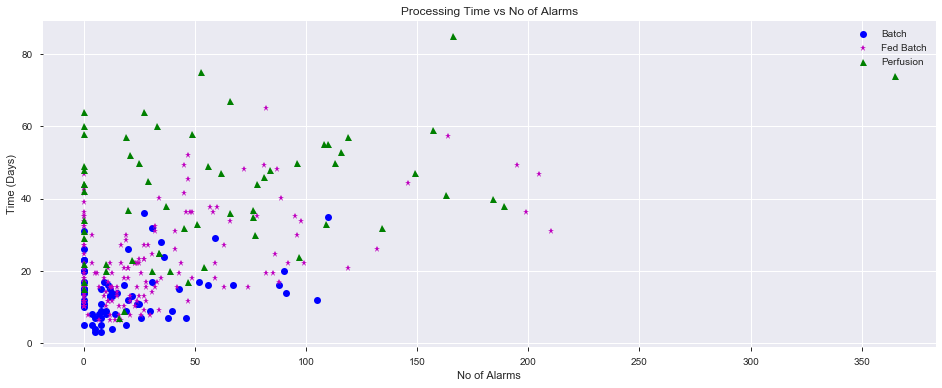

In [20]:
# Plotting the total alarms against the processing time for Batch
plt.plot(dfMicro.alarm[dfMicro.culture == "Batch"],dfMicro.time[dfMicro.culture == "Batch"], "bo", label="Batch")
plt.plot(dfMam.alarm[dfMam.culture == "Batch"],dfMam.time[dfMam.culture == "Batch"], "bo")
plt.plot(dfHum.alarm[dfHum.culture == "Batch"],dfHum.time[dfHum.culture == "Batch"], "bo")

# Plotting the total alarms against the processing time for Fed Batch
plt.plot(dfMicro.alarm[dfMicro.culture == "Fed Batch"],dfMicro.time[dfMicro.culture == "Fed Batch"], "m*", label="Fed Batch")
plt.plot(dfMam.alarm[dfMam.culture == "Fed Batch"],dfMam.time[dfMam.culture == "Fed Batch"], "m*")
plt.plot(dfHum.alarm[dfHum.culture == "Fed Batch"],dfHum.time[dfHum.culture == "Fed Batch"], "m*")

# Plotting the total alarms against the processing time for Perfusion
plt.plot(dfMicro.alarm[dfMicro.culture == "Perfusion"],dfMicro.time[dfMicro.culture == "Perfusion"], "g^", label="Perfusion")
plt.plot(dfMam.alarm[dfMam.culture == "Perfusion"],dfMam.time[dfMam.culture == "Perfusion"], "g^")
plt.plot(dfHum.alarm[dfHum.culture == "Perfusion"],dfHum.time[dfHum.culture == "Perfusion"], "g^")

# Adding the info to the plot
plt.legend()
plt.xlabel("No of Alarms")
plt.ylabel("Time (Days)")
plt.title("Processing Time vs No of Alarms")

### <a name="yield"></a> 2.9 Yield  
The reason the cells are grown in the bioreactor is to product the protein of choice e.g. an antibody, generally for therapeutic use. The yield is the amount of product produced [[15]](#15) and all variables simulated have either a direct or an indirect impact on the yield as follows:  

* **Cell line** - Cell line has an impact on almost every parameter shown. For the purposes of simulation, each cell line will have its own parameters.  
    - Microbial cells generally have a high yield and are more robust in processing.
    - CHO cells have a much reduced yield and are less robust. Having said that, they are capable of producing much more complex proteins.  
    - Humanised cells would be similar to the mammalian cells.
* **Bioreactor Size**  - The size of the bioreactor has a great impact on the yield produced because in general, more volume means more cells which means more product. The bioreactor size however reflects the volume of the bioreactor itself. The entire vessel is never full and as a result we will factorise this by making an assumption that it is 60% full. 
* **Average Temperature / Dissolved Oxygen / No of Alarms** - The average temperature and dissolved oxygen readings have an indirect effect on yield in that their cumulative effect is represented in the number of alarms generated. It is reasonable to expect that in a well controlled process there would be fewer alarms which would in turn mean that the processing occurred nearer the optimal conditions and therefore have greater product yields.  
* **Peak Viable Cell Density** - generally more cells mean more product.
* **Processing Hours**  
    - For Batch / Fed-Batch his relates more to the number of alarms generated, which affects yield.  
    - For perfusion cultures this is directly related to yield
* **Culture type** - depending on the culture type, how the other factors affect them  
    - Batch / Fed-Batch - along with the cell density, the bioreactor size is the most important aspect to simulating the yield. The processing time is not as important.  
    - Perfusion - next to cell density, the processing time is the most important attribute as the cells are constantly producing product for most of that time and the times are extended. The bioreactor size is still important however.  

Yield calculation of Batch and Fed Batch cultures:  
* We assume at the mean cell density we would have a normal distribution with a mean of 8 g/l for Mammalian cells, 7 g/l for Humanised and 10 g/l for microbial cells.   
* Multiply the base by the actual cell density / mean expected cell density
* Determine the number of alarms / day, if greater than 1.2 (our expected interval from the Poisson Distribution) divide the yield by the alarms per day value.  

Yield calculation for Perfusion cultures:  
* Add an additional multiplier for perfusion based on the time in bioreactor. As the cell density of a perfusion culture system is much greater than a batch / fed-batch system, the multiplier for time spent in the bioreactor will be added.  

The final yield added to the dataset will be in kg so will need to be divided by 1000. We will subsequently round the yield off to two decimal places.

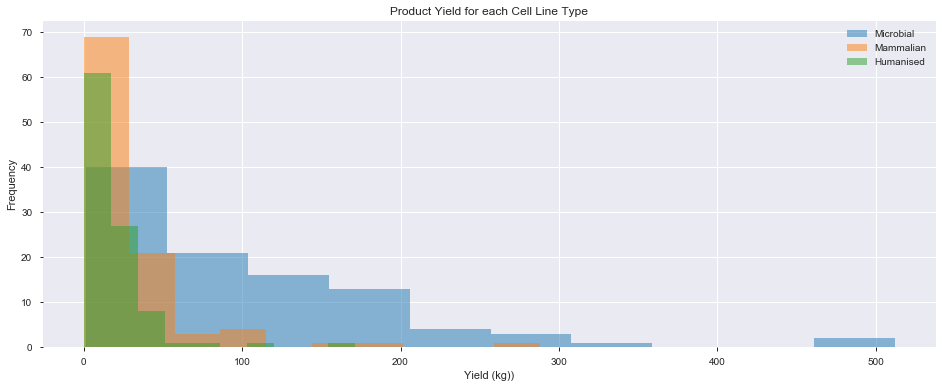

In [21]:
for dataset in datasets:
    # Create an empty list for the values
    brYield = []
    
    # This is our base cell density for each cell line
    if dataset.cell_line[0] == "Microbial":
        cl_multi = 10
    elif dataset.cell_line[0] == "CHO":
        cl_multi = 8
    elif dataset.cell_line[0] == "vCHO":
        cl_multi = 7
    
    # Create a normal distribution around the base
    brYield = np.random.normal(cl_multi, 1, size= 100)

    # As we are using a normal distribution - make sure none of our values are below zero. Zero is acceptable.
    # Also converting to numpy array as needed for rounding below
    brYield = np.asarray(setLimits(brYield, True, False, 0.0, 0.0), dtype=np.float32)

    # Iterate over rows with iterrows()
    for index, row in dataset.iterrows():
        # Set the alarm factor - based on alarms per day
        alm_day = row.alarm / row.time
        # If there were less than 1.2 alarms per day - there should be no effect
        if alm_day < 1.2: alm_day = 1
            
        # Set the multipliers for each culture type
        if row.culture == "Batch":
            # The actual cell density divided by the mean cell density
            # The mean here is the one used to create the Normal Distribution of the cell density
            cm_multi = row.cell_density / 4
        elif row.culture == "Fed Batch":
            # As per the batch with the Fed Batch cell density included
            cm_multi = row.cell_density / 6
        elif row.culture == "Perfusion":
            # An additional multiplier here to reflect the length of time in the bioreactor
            cm_multi = 0.1 * row.time * row.cell_density / 15
            
        # Change the brYield list to reflect the multipliers
        brYield[index] = brYield[index] * row.br_size * 0.6 * cm_multi/ alm_day
    
    # Convert the g to kg and round the values to 2 decimal places
    brYield = list(np.around(np.array(brYield/1000),2))
    
    # Add the simulated Bioreactor yield data to the dataframe
    dataset["br_yield"] =  brYield
    
    # Plot 
    plt.hist(brYield, bins = 10, alpha = 0.5)

# Label the plot accordingly
plt.xlabel("Yield (kg))")
plt.ylabel("Frequency")
plt.title("Product Yield for each Cell Line Type")
plt.legend(dsNames)

In [22]:
i = 0
# Sanity Check
for dataset in datasets:
    print("="*40)
    # For each dataset
    print("The top 5 " + dsNames[i] + " yield values are:")
    print("")
    # Show the top 5 yields of each [18]
    print(dataset[["br_size", "culture", "cell_density", "time", "alarm", "br_yield"]].nlargest(5,"br_yield"))
    print("")
    print("The bottom 5 " + dsNames[i] + " yield values are:")
    print("")
    # And the bottom 5 yields of each
    print(dataset[["br_size", "culture", "cell_density", "time", "alarm", "br_yield"]].nsmallest(5,"br_yield"))
    print("")
    i+=1

The top 5 Microbial yield values are:

    br_size    culture  cell_density  time  alarm    br_yield
59     4800  Perfusion            60  49.0      0  512.099976
52     5600  Perfusion            64  34.0      0  470.279999
60     6400  Perfusion            56  44.0     78  312.869995
56    10000      Batch            16  14.0     15  284.260010
22    10000  Fed Batch            28   6.5      7  284.190002

The bottom 5 Microbial yield values are:

    br_size    culture  cell_density  time  alarm  br_yield
87      700      Batch             8   7.0     38      1.50
35     1800      Batch            12   7.0     46      5.34
76     1000  Fed Batch            24   7.8     30      7.01
89     2900  Fed Batch            20  11.7     47     12.57
98     1300  Perfusion            56   9.0     18     12.64

The top 5 Mammalian yield values are:

    br_size    culture  cell_density  time  alarm    br_yield
94     7800  Perfusion            15  75.0     53  287.959991
58     5500  Perfusion

Text(0.5, 1.0, 'Bioreactor Size vs Yield for Each Culture Type')

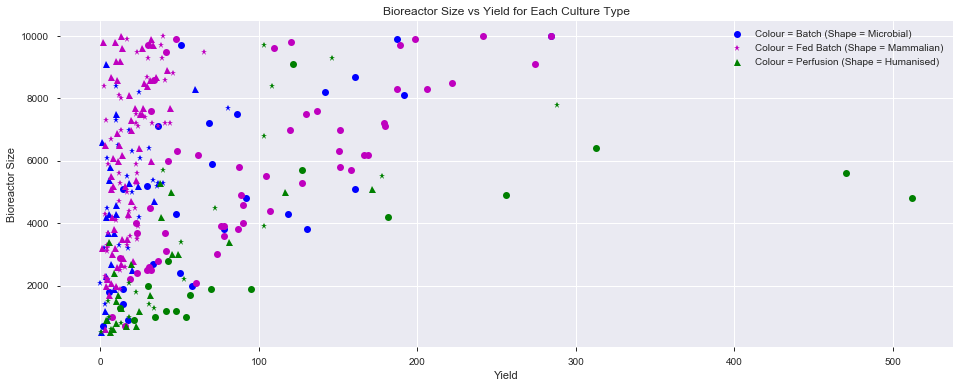

In [23]:
# Plotting the total yield against the processing time for Batch
plt.plot(dfMicro.br_yield[dfMicro.culture == "Batch"],dfMicro.br_size[dfMicro.culture == "Batch"], "bo", label="Colour = Batch (Shape = Microbial)")
plt.plot(dfMam.br_yield[dfMam.culture == "Batch"],dfMam.br_size[dfMam.culture == "Batch"], "b*")
plt.plot(dfHum.br_yield[dfHum.culture == "Batch"],dfHum.br_size[dfHum.culture == "Batch"], "b^")

# Plotting the total alarms against the processing time for Fed Batch
plt.plot(dfMicro.br_yield[dfMicro.culture == "Fed Batch"],dfMicro.br_size[dfMicro.culture == "Fed Batch"], "mo")
plt.plot(dfMam.br_yield[dfMam.culture == "Fed Batch"],dfMam.br_size[dfMam.culture == "Fed Batch"], "m*", label="Colour = Fed Batch (Shape = Mammalian)")
plt.plot(dfHum.br_yield[dfHum.culture == "Fed Batch"],dfHum.br_size[dfHum.culture == "Fed Batch"], "m^")

# Plotting the total alarms against the processing time for Perfusion
plt.plot(dfMicro.br_yield[dfMicro.culture == "Perfusion"],dfMicro.br_size[dfMicro.culture == "Perfusion"], "go")
plt.plot(dfMam.br_yield[dfMam.culture == "Perfusion"],dfMam.br_size[dfMam.culture == "Perfusion"], "g*")
plt.plot(dfHum.br_yield[dfHum.culture == "Perfusion"],dfHum.br_size[dfHum.culture == "Perfusion"], "g^", label="Colour = Perfusion (Shape = Humanised)")

# Adding the info to the plot
plt.legend()
plt.xlabel("Yield")
plt.ylabel("Bioreactor Size")
plt.title("Bioreactor Size vs Yield for Each Culture Type")

### <a name="worth"></a>2.10 Net Worth of Batch  
Biopharmaceuticals are an expensive commodity [[16](#16)] used to treat many different diseases. According to the Australian Government [[19](#19)] the Dec 2019 average cost per gram of (a subset of 32) biopharmaceuticals was just over AU\\$60K.  

This broke down to:  
* Microbial: min AU\\$6.14; max AU\\$3207; mean AU\\$911
* Mammalian: min AU\\$1833; max AU\\$607479; mean AU\\$44913
* Humanised: min AU\\$1019; max AU\\$949500; mean: AU\\$127602

The reason for the big spread of microbial prices is due to the nature of products produced from the lower value anitbiotics to the higher end mAb fragments [[14](#14)].  

The humanised average is skewed heavily to the right due to a single outlier, Lemtrada, used to treat CLL and MS which worked out at close to one million dollars per gram.  

Similarly, the mammalian average is skewed to the right due to Lucentis, priced at over AU\\$600,000 per gram.

For the purposes of this simulation, we will exclude the two outliers from the mammalian and humanised price lists and base all other pricing on a uniform distribution per cell line as follows:  
* Microbial: 
    - Min AU\\$6  
    - Max AU\\$3207
* Mammalian:  
    - Min AU\\$1833
    - Max AU\\$37046
* Humanised:
    - Min AU\\$1019
    - Max AU\\$110367  

Then we will sort the price per kg in descending order and match it to a temporary field in dataframe corresponding to the  time spent processing vs bioreactor size. We are doing this as we are assuming that because processing is an expensive task, the longer you processing your product the more expensive the product will be. 

In [24]:
for dataset in datasets:
    # Set the min and max values for each cell culture type
    if dataset.cell_line[0] == "Microbial":
        minWorth = 6
        maxWorth = 3207
    elif dataset.cell_line[0] == "CHO":
        minWorth = 1833
        maxWorth = 37046
    elif dataset.cell_line[0] == "vCHO":
        minWorth = 1019
        maxWorth = 110367      
    # Create a temporary column to sort the data
    dataset["temp"] = dataset.time/dataset.br_size
    # Sort the dataset by the temporary column
    dataset.sort_values(by = ["temp"], ascending = False, inplace = True)
    # Reset the index
    #dataset = dataset.reset_index(drop=True)

    # Create a uniform distribution based min and max values
    worth = np.random.uniform(minWorth, maxWorth, 100)
    # Sort the list in descending order
    worth = sorted(worth, reverse=True)

    # Add in the worth column
    dataset["worth"] = worth
    # Convert the worth to actual worth rather than worth per gram
    dataset.worth = list(map(int, dataset.worth * dataset.br_yield))
    # Drop the temporary column now it is sorted
    dataset.drop(columns="temp", inplace = True)

In [25]:
dfHum.head(5)
#dfMam.sample(5)
#dfMicro.sample(5)

cell_line  br_size  avg_temp  avg_do    culture  cell_density  time  alarm  \
75      vCHO      500      36.5     5.1  Perfusion            17  47.0     62   
89      vCHO      700      37.5     5.7  Perfusion            16  58.0      0   
13      vCHO      700      37.3     5.5  Perfusion            16  48.0      0   
64      vCHO      600      37.2     5.3  Perfusion            15  37.0     20   
53      vCHO     1300      36.5     5.8  Perfusion            16  59.0    157   

     br_yield    worth  
75   6.060000   668369  
89  22.299999  2423883  
13  16.330000  1760524  
64   7.940000   840939  
53  13.060000  1377234

In [26]:
i = 0
# Sanity Check
for dataset in datasets:
    print("="*40)
    # For each dataset
    print("The top 5 " + dsNames[i] + " worth values are:")
    print("")
    # Show the top 5 yields of each [18]
    print(dataset[["br_size", "culture", "cell_density", "time", "alarm", "br_yield", "worth"]].nlargest(5,"worth"))
    print("")
    print("The bottom 5 " + dsNames[i] + " worth values are:")
    print("")
    # And the bottom 5 yields of each
    print(dataset[["br_size", "culture", "cell_density", "time", "alarm", "br_yield", "worth"]].nsmallest(5,"worth"))
    print("")
    i+=1

The top 5 Microbial worth values are:

    br_size    culture  cell_density  time  alarm    br_yield    worth
59     4800  Perfusion            60  49.0      0  512.099976  1357419
52     5600  Perfusion            64  34.0      0  470.279999  1179385
60     6400  Perfusion            56  44.0     78  312.869995   795584
47     4900  Perfusion            60  29.0      0  255.820007   631280
79     4200  Perfusion            56  33.0     51  181.289993   472470

The bottom 5 Microbial worth values are:

    br_size    culture  cell_density  time  alarm   br_yield  worth
53     7100      Batch            12   3.0      8  36.349998   1356
9      8600  Fed Batch            12   7.8     26  33.799999   3764
87      700      Batch             8   7.0     38   1.500000   3919
11     9900  Fed Batch            12   6.5     17  48.000000   4141
23     7600  Fed Batch            16   9.1     34  32.080002   4714

The top 5 Mammalian worth values are:

    br_size    culture  cell_density  time  

## <a name="finish"></a>3. Finishing Off the Dataset

In [27]:
# Now we will amalgamate the threee datasets into one
df = pd.concat(datasets)
# Mix up the dataframe - resetting the index as we do [10]
df = df.sample(frac=1).reset_index(drop=True)
# And presenting our new simulated dataframe!
df

cell_line  br_size  avg_temp  avg_do    culture  cell_density  time  \
0    Microbial     5500      37.5     6.0  Fed Batch            20  14.3   
1         vCHO     6500      36.9     6.2  Fed Batch             5  37.7   
2    Microbial     5700      37.0     5.1  Fed Batch            28  11.7   
3         vCHO     8500      37.1     5.4  Fed Batch             6  29.9   
4    Microbial     5800      36.4     5.9  Fed Batch            28  10.4   
5         vCHO     8600      37.2     4.6  Fed Batch             4  40.3   
6         vCHO     5200      36.8     6.5      Batch             4  23.0   
7         vCHO     3700      37.4     4.9      Batch             6   9.0   
8          CHO     3600      37.5     5.6  Fed Batch             7  22.1   
9          CHO     2200      37.6     6.2  Fed Batch             2  11.7   
10   Microbial     7200      37.6     5.8      Batch            16  11.0   
11        vCHO     5100      36.9     4.6  Fed Batch             4  19.5   
12   Microbial     9900      37.3     4.8  Fed Batch            12   6.5   
13         CHO     6400      37.3     6.0      Batch             4  15.0   
14        vCHO     1200      36.9     5.1  Perfusion            16  42.0   
15        vCHO     9800      37.7     5.5  Fed Batch             4  44.2   
16        vCHO     1900      36.8     6.4      Batch             4  15.0   
17         CHO     5900      36.5     6.7  Fed Batch             4  22.1   
18        vCHO     2100      36.4     5.7  Fed Batch             7  10.4   
19         CHO     4500      36.9     5.5  Fed Batch             6  32.5   
20   Microbial     3900      37.4     5.3  Fed Batch            16  14.3   
21   Microbial    10000      37.3     5.8  Fed Batch            24  28.6   
22        vCHO     7500      37.0     5.3  Fed Batch             6  22.1   
23   Microbial     1000      36.6     5.9  Perfusion            56  23.0   
24         CHO     7000      37.0     5.2  Fed Batch             4  37.7   
25   Microbial     7600      36.5     5.4  Fed Batch            20  22.1   
26   Microbial     4000      36.3     6.7  Fed Batch            12  11.7   
27        vCHO      700      37.3     5.5  Perfusion            16  48.0   
28   Microbial     2400      37.4     6.1  Fed Batch            24   6.5   
29        vCHO     1500      36.5     5.5  Perfusion            17  41.0   
..         ...      ...       ...     ...        ...           ...   ...   
270  Microbial    10000      37.2     6.0      Batch            16  14.0   
271       vCHO     9800      36.2     5.3  Fed Batch             1  22.1   
272  Microbial     7100      37.0     6.0  Fed Batch            24  22.1   
273  Microbial     5700      37.2     4.9  Perfusion            56  33.0   
274  Microbial     5800      36.9     5.6  Fed Batch            16  16.9   
275  Microbial     2000      37.7     5.6  Perfusion            60  24.0   
276       vCHO     2300      36.4     6.1      Batch             5   4.0   
277       vCHO     2400      36.9     5.3  Perfusion            16  17.0   
278  Microbial     4400      37.0     5.9  Fed Batch            24  14.3   
279        CHO     8100      37.7     6.1  Fed Batch             7  24.7   
280  Microbial     2500      37.0     4.7  Fed Batch            20   7.8   
281  Microbial     1000      37.7     4.8  Perfusion            60  17.0   
282        CHO     4500      36.7     4.7  Perfusion            17  48.0   
283       vCHO     4700      36.7     5.9  Fed Batch             7  11.7   
284  Microbial     9500      37.2     4.8  Fed Batch            20  16.9   
285       vCHO     3700      37.7     6.1      Batch             3   5.0   
286        CHO     3200      37.2     6.5      Batch             2   7.0   
287        CHO     1400      37.4     5.9  Perfusion            15  45.0   
288        CHO     1000      36.5     5.6  Perfusion            16  44.0   
289        CHO     5200      37.2     5.6      Batch             6  17.0   
290        CHO     3300      36.5     5.2  Fed Batch 

## <a name="describe"></a>4. Describe New Dataset  

So, in the same way we would with any dataset we will describe, check for null values and look at the head, tail and a sample of the data.

In [28]:
# Get the shape of the dataset
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns")
# Describe the dataset
df.describe()

The dataset has 300 rows and 10 columns


br_size   avg_temp      avg_do  cell_density        time  \
count    300.000000  300.00000  300.000000    300.000000  300.000000   
mean    5070.333333   37.05400    5.523667     13.356667   24.740000   
std     2745.178788    0.47768    0.482059     13.222414   15.447707   
min      500.000000   35.80000    3.900000      0.000000    3.000000   
25%     2775.000000   36.70000    5.200000      5.000000   13.000000   
50%     5000.000000   37.10000    5.500000      8.000000   20.000000   
75%     7225.000000   37.40000    5.900000     16.250000   34.250000   
max    10000.000000   38.20000    6.700000     64.000000   85.000000   

            alarm    br_yield         worth  
count  300.000000  300.000000  3.000000e+02  
mean    35.633333   50.258600  6.723848e+05  
std     46.879325   69.692056  1.436227e+06  
min      0.000000    0.000000  0.000000e+00  
25%      0.000000   10.382500  9.305925e+04  
50%     20.000000   23.240001  2.310450e+05  
75%     47.250000   51.297501  6.579110e+05  
max    365.000000  512.099976  1.478658e+07

In [29]:
df.isnull().values.any()

False

In [30]:
df.head()

cell_line  br_size  avg_temp  avg_do    culture  cell_density  time  alarm  \
0  Microbial     5500      37.5     6.0  Fed Batch            20  14.3     15   
1       vCHO     6500      36.9     6.2  Fed Batch             5  37.7     60   
2  Microbial     5700      37.0     5.1  Fed Batch            28  11.7      0   
3       vCHO     8500      37.1     5.4  Fed Batch             6  29.9     19   
4  Microbial     5800      36.4     5.9  Fed Batch            28  10.4      0   

     br_yield   worth  
0  104.209999  175013  
1   11.530000  732265  
2  158.050003  167463  
3   27.309999  534361  
4  151.259995  115948

In [31]:
df.tail()

cell_line  br_size  avg_temp  avg_do    culture  cell_density  time  \
295       vCHO     2600      37.3     5.6  Fed Batch             6  19.5   
296       vCHO     8700      36.3     5.5  Fed Batch             6  36.4   
297       vCHO     2700      36.7     5.3      Batch             6  13.0   
298  Microbial     9700      36.9     4.0  Fed Batch            20  20.8   
299  Microbial     9100      37.6     5.9  Fed Batch            24  11.7   

     alarm    br_yield   worth  
295     13   10.730000  823938  
296    199    6.710000  246519  
297     22    6.780000  334943  
298    119   30.209999   36219  
299     13  274.500000   93833

In [32]:
df.sample(5)

cell_line  br_size  avg_temp  avg_do    culture  cell_density  time  \
82         CHO     4500      36.2     6.3      Batch             1  11.0   
166       vCHO     5200      37.5     5.6  Fed Batch             4  23.4   
114  Microbial     1200      37.7     5.5  Perfusion            52  25.0   
64        vCHO     2200      37.1     4.6  Fed Batch             6   6.5   
123       vCHO     5300      36.7     4.9      Batch             7  24.0   

     alarm   br_yield   worth  
82       0   4.330000   25140  
166     27  15.770000  656622  
114     34  41.369999  125273  
64      14   4.160000   74028  
123     36  18.260000  795891

The data all looks good. We will now run the pandas profile report.

This profile report is a great summary of the entire dataset.

In [33]:
profile = pandas_profiling.ProfileReport(df)
profile

The dataset info reads correctly - 10 variables with 300 obversations, no missing and (most likely) no duplicate rows. There are 8 numeric and 2 categorical (cell_line and culture).  

Depending on what data was generated to this point (seed has not been set) there may be a number of warnings of zero values:  
* alarms  
* yield  
* worth  

Lets have a look at some plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC0CB92198>,
      dtype=object)

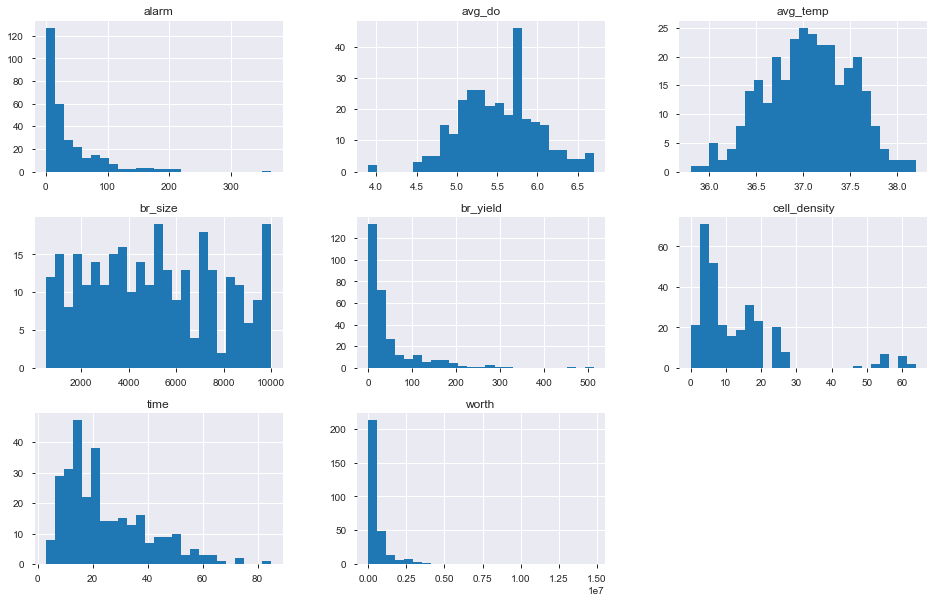

In [34]:
plt.rcParams['figure.figsize'] = [16, 10]
df.hist(bins=25)

We would expect to see the alarms, yield and worth histograms to have an abundance of data near the y axis, dropping off very quickly before tapering out to a few outliers. The worth should be an exaggeration of the yield.  

The DO and temperature should have a normal type distribution although the DO should not exceed 6.7.  

The bioreactor size should be evenly spread throughout the range.  

The cell density and time histograms are heavily influenced by the culture type. Given that we would expect more fed batch and batch together than perfusion cultures we would expect a positively skewed profile with the degree of kurtosis depending on the proportion perfusion cultures. The time histogram would most likely show the greater kurtosis of the two.
[[25](#25)].  

Now let's look at the pairplots segregated by cell line and culture type.

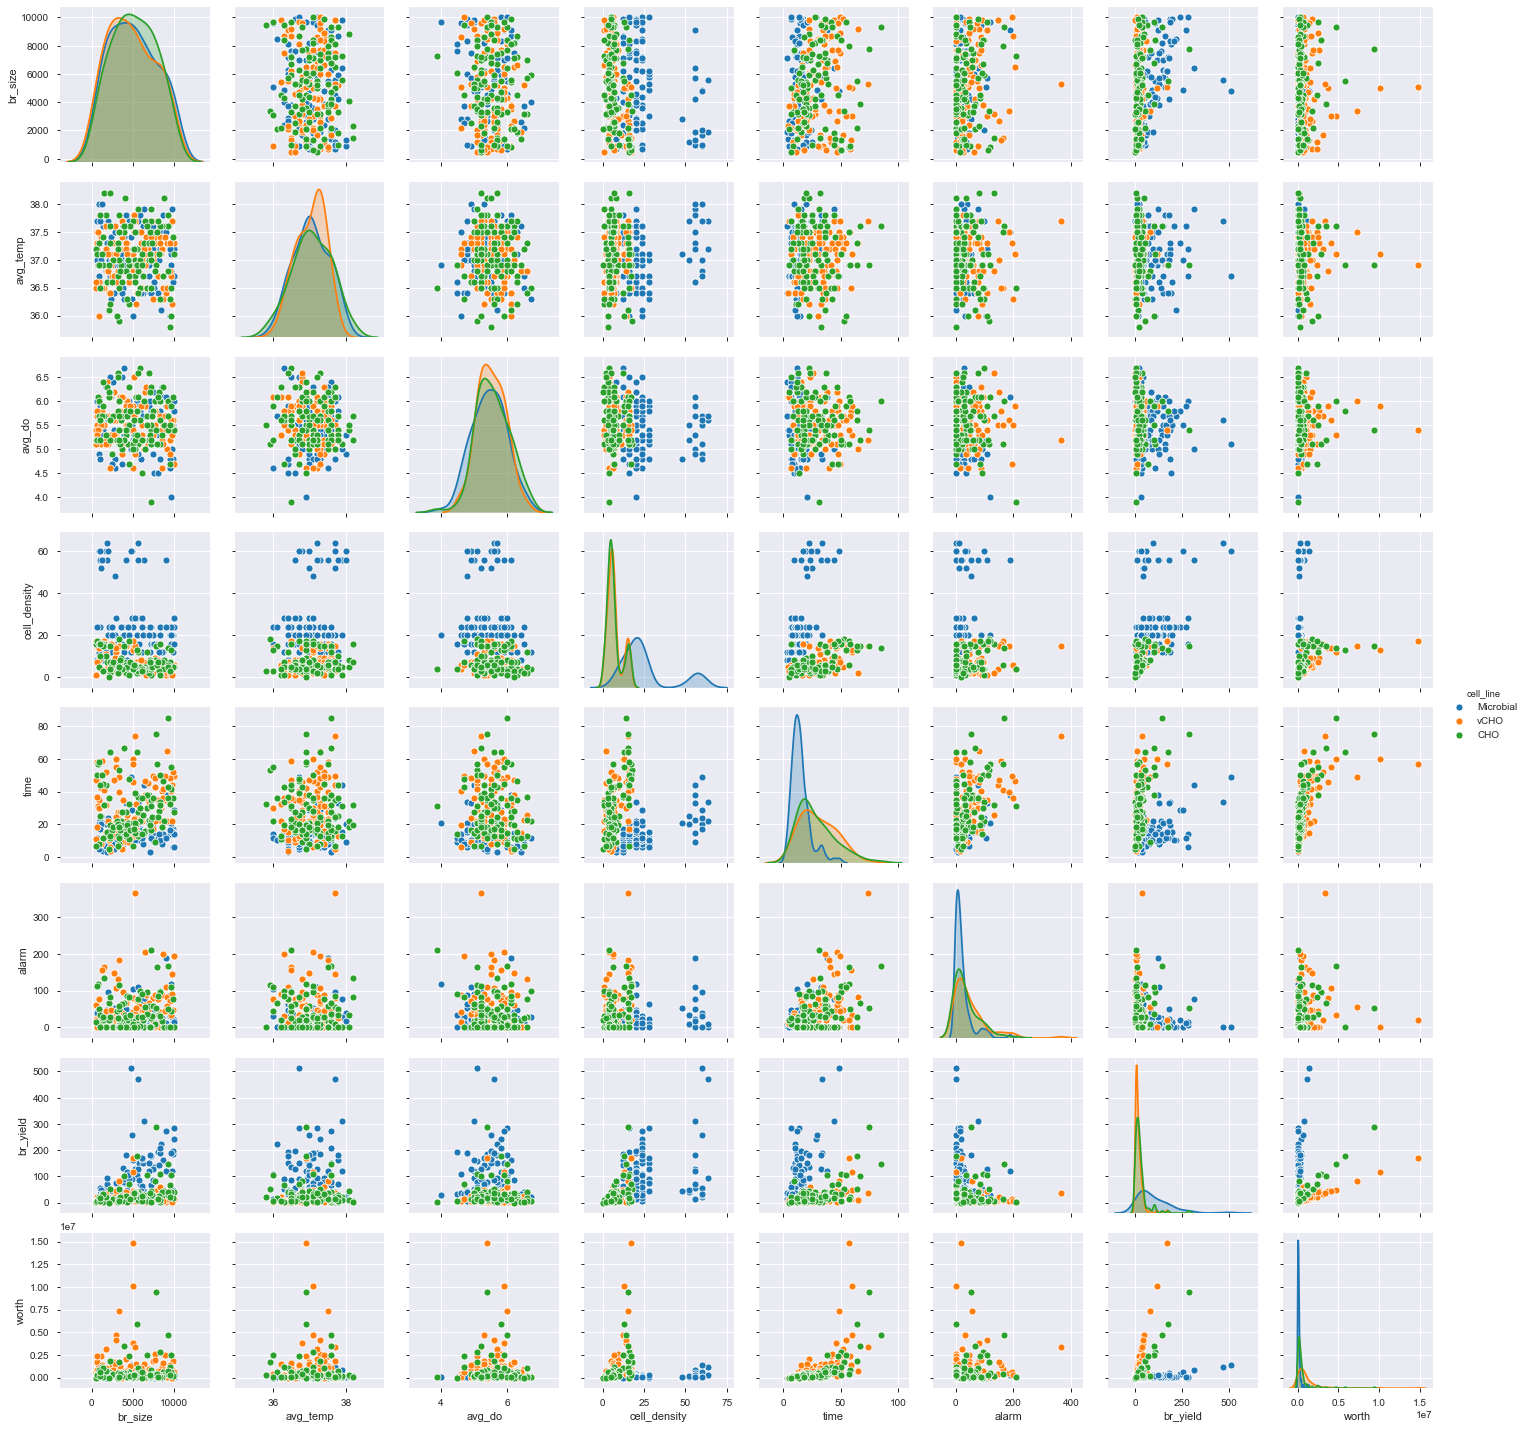

In [35]:
sns.pairplot(df,hue="cell_line")

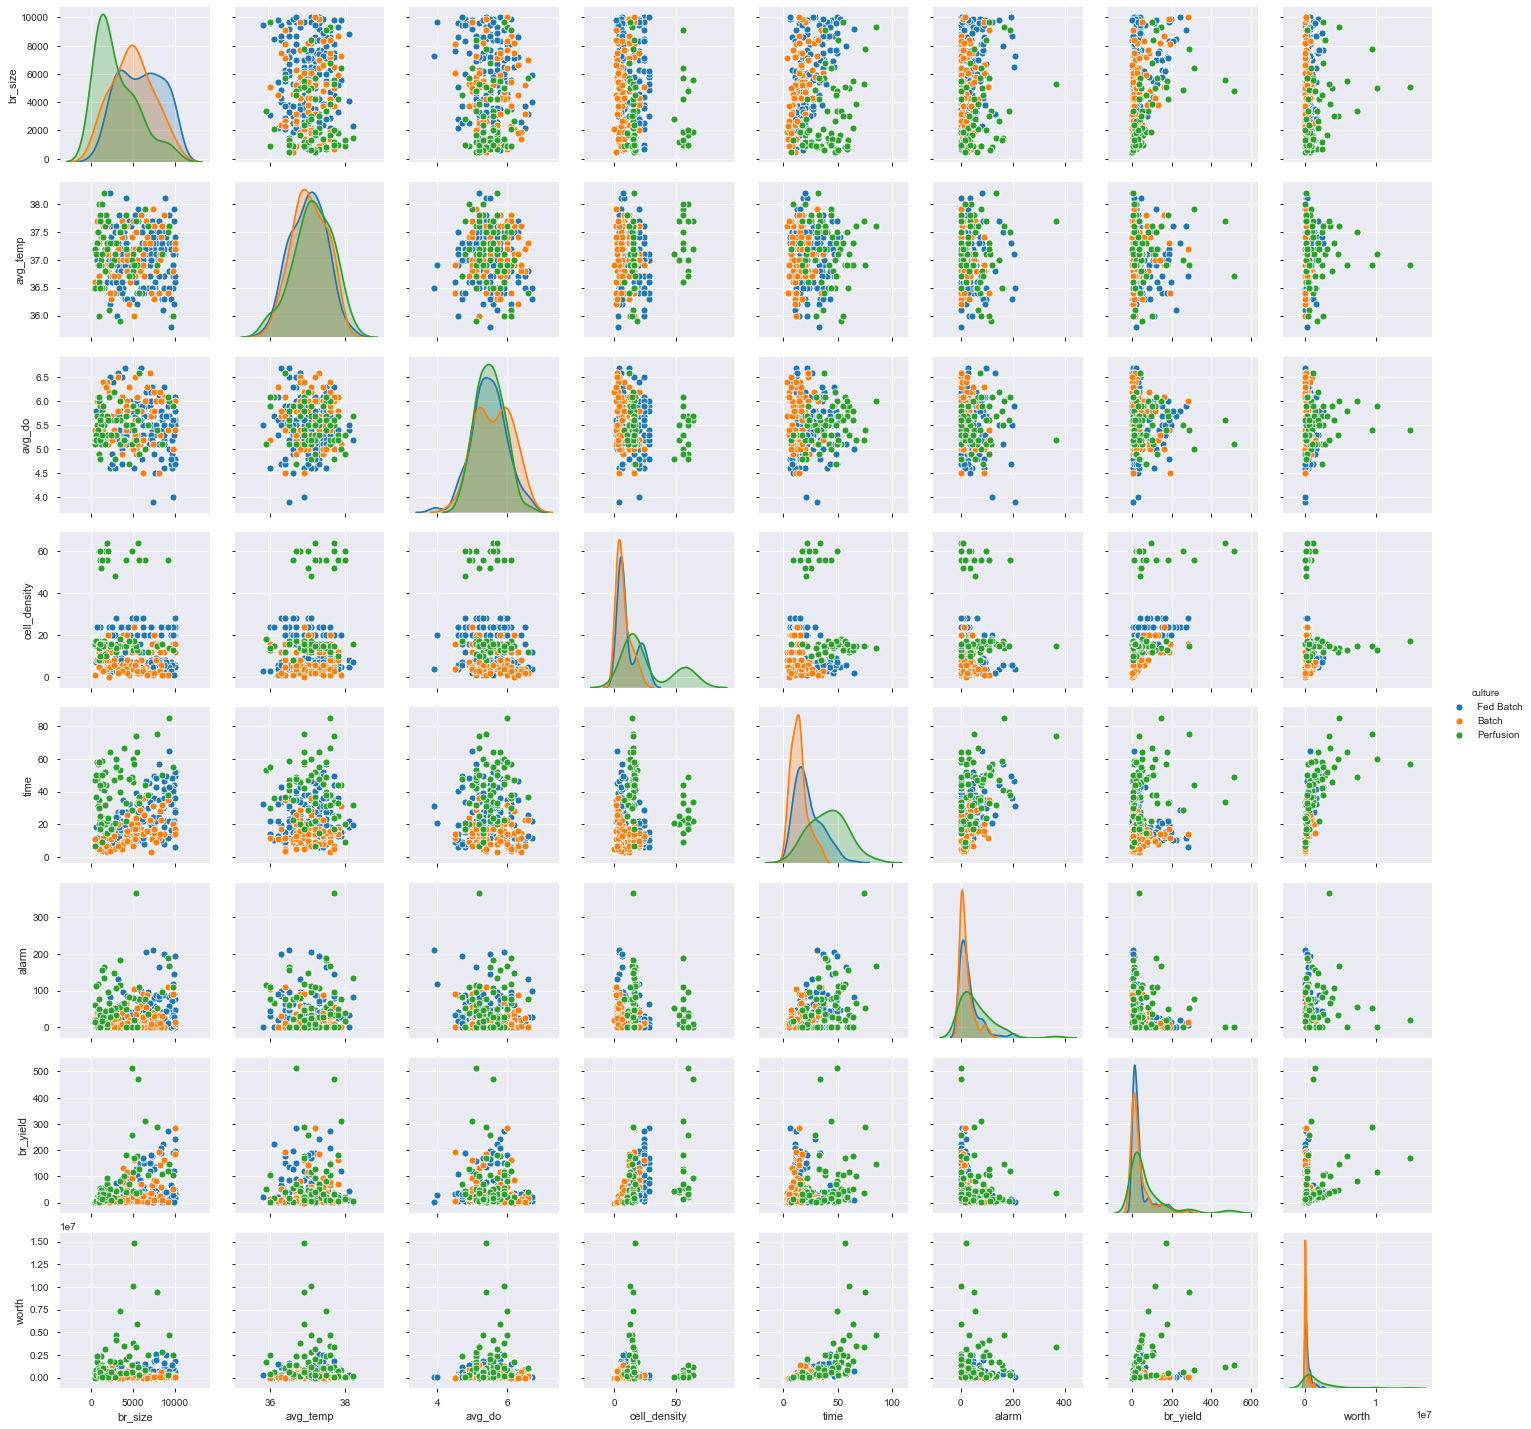

In [36]:
sns.pairplot(df,hue="culture")

Looking at the pairplots, it is clear that the cell_line and culture types have a profound effect on many of the variables listed.  

For further checking, lets create correlation matrices for the total dataset and each of the cell lines and culture types. We will only view them for now. The correlations themselves will be discussed on the variable level below.

In [37]:
# Create correlation matrices for each cell line and culture
cm = df.corr().round(2)
cmMicro = df[df.cell_line =="Microbial"].corr().round(2)
cmCHO = df[df.cell_line =="CHO"].corr().round(2)
cmvCHO = df[df.cell_line =="vCHO"].corr().round(2)
cmBatch = df[df.culture =="Batch"].corr().round(2)
cmFedBatch = df[df.culture =="Fed Batch"].corr().round(2)
cmPerf = df[df.culture =="Perfusion"].corr().round(2)

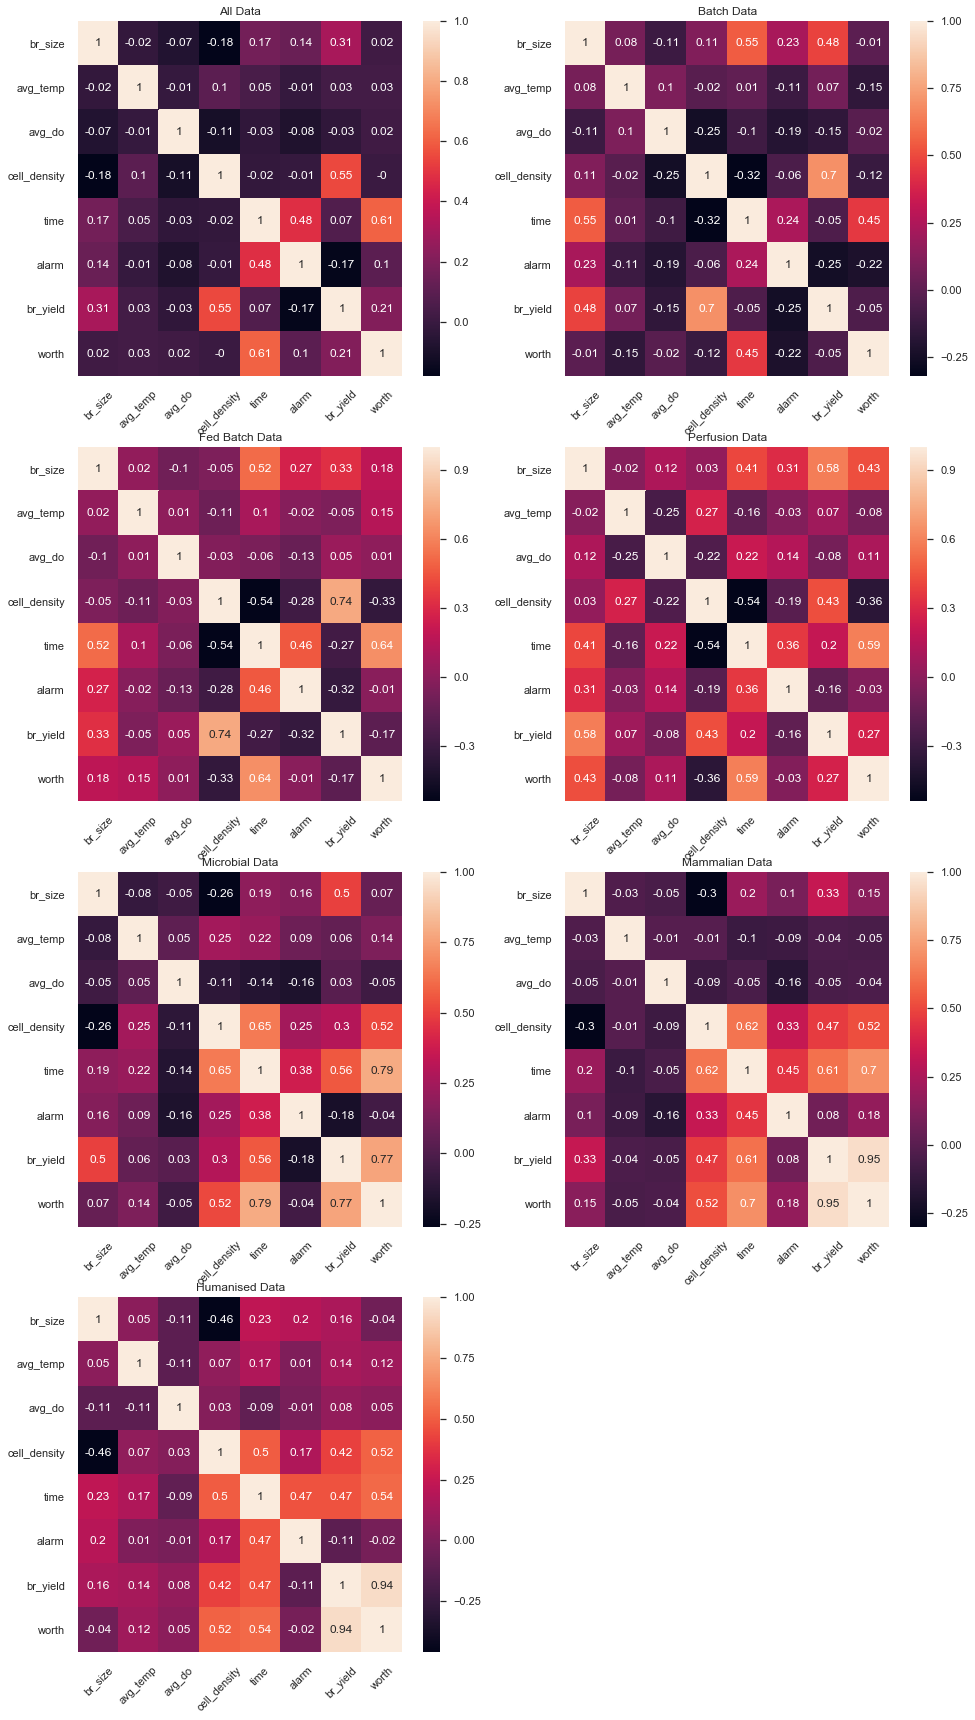

In [38]:
sns.set(rc={'figure.figsize':(16,30)})
# Here we create a figure instance, and two subplots
fig = plt.figure()
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)

ax1.title.set_text("All Data")
ax2.title.set_text("Batch Data")
ax3.title.set_text("Fed Batch Data")
ax4.title.set_text("Perfusion Data")
ax5.title.set_text("Microbial Data")
ax6.title.set_text("Mammalian Data")
ax7.title.set_text("Humanised Data")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45)

# annot = True to print the values inside the square
sns.heatmap(data=cm, annot=True, ax=ax1)
sns.heatmap(data=cmBatch, annot=True, ax=ax2)
sns.heatmap(data=cmFedBatch, annot=True, ax=ax3)
sns.heatmap(data=cmPerf, annot=True, ax=ax4)
sns.heatmap(data=cmMicro, annot=True, ax=ax5)
sns.heatmap(data=cmCHO, annot=True, ax=ax6)
sns.heatmap(data=cmvCHO, annot=True, ax=ax7)

Time to take a look at each variable in turn lets see do they follow our expectations and how they correlate with other variables.

### 4.1 Cell Line <a name="cl"></a>

The only thing we can check for the cell line is that each cell line is equally represented in the dataset with 100 values each.

In [39]:
# See how many of each there are
df.cell_line.value_counts()

Microbial    100
vCHO         100
CHO          100
Name: cell_line, dtype: int64

### 4.2 Bioreactor Size <a name = "bs"></a>

We should already know about the bioreactor size being a uniform distribution from above. Let's look at the differences when we take cell culture and cell line into consideration.

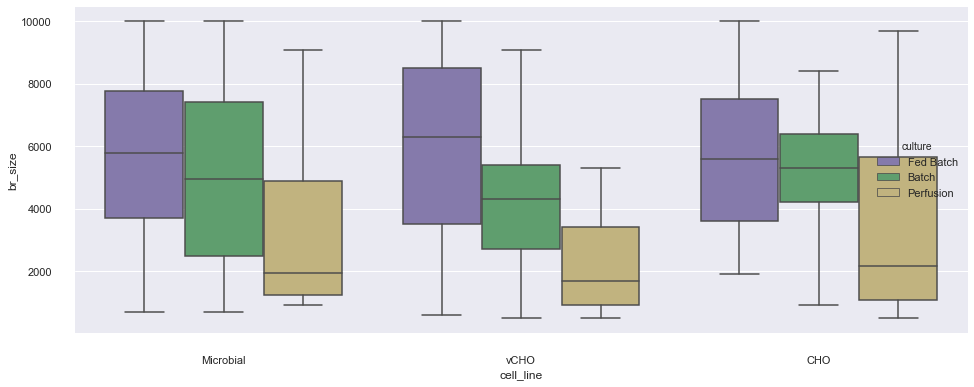

In [40]:
# Resaet the fig size again
sns.set(rc={'figure.figsize':(16,6)})
# Do a boxplot of cell line against bioreactor size separating out by the culture type
sns.boxplot(x="cell_line", y="br_size", hue="culture", palette=["m", "g", "y"], data=df)
sns.despine(offset=10, trim=True)

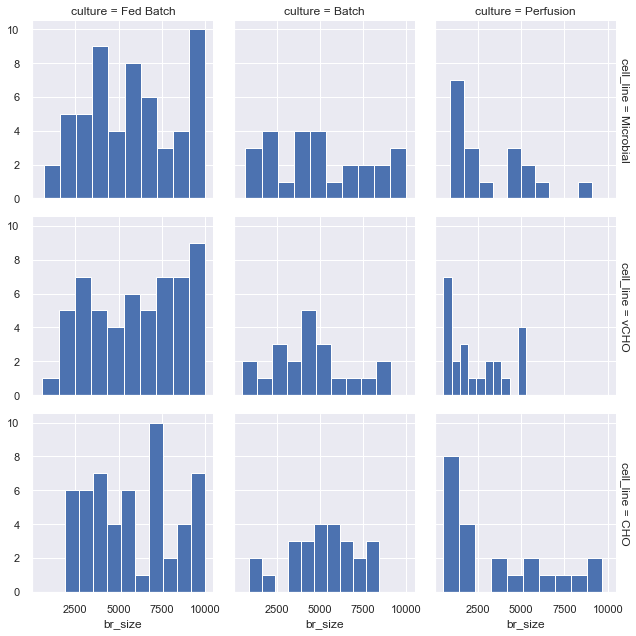

In [41]:
# Create a FacetGrid showing the temparture distributions for cell lines and cultures
g = sns.FacetGrid(df, row="cell_line", col="culture", margin_titles=True)
bins = 10
g.map(plt.hist, "br_size", bins=10)

We can see there is no difference between the different cell types which is to be expected. The Fed Batch culture type should have the biggest bioreactor size, followed by the Batch and finally the Perfusion, but with plenty of overlap.  

Let's check its correlations.

In [42]:
# Concatenate correlation coefficients [26]
feature = "br_size"
# Put all the correlation co-efficients together into one dataframe
dfSize = pd.concat([cm[feature], cmMicro[feature], cmCHO[feature], cmvCHO[feature], 
                   cmBatch[feature], cmFedBatch[feature], cmPerf[feature]], axis=1)
# Rename the columns so we dn't get confused
dfSize.columns = ["all", "microbial", "mammalian", "humanised", "batch", "fed_batch", "perfusion"]

In [43]:
# Show all the correlation co-efficients together
dfSize

all  microbial  mammalian  humanised  batch  fed_batch  \
br_size       1.00       1.00       1.00       1.00   1.00       1.00   
avg_temp     -0.02      -0.08      -0.03       0.05   0.08       0.02   
avg_do       -0.07      -0.05      -0.05      -0.11  -0.11      -0.10   
cell_density -0.18      -0.26      -0.30      -0.46   0.11      -0.05   
time          0.17       0.19       0.20       0.23   0.55       0.52   
alarm         0.14       0.16       0.10       0.20   0.23       0.27   
br_yield      0.31       0.50       0.33       0.16   0.48       0.33   
worth         0.02       0.07       0.15      -0.04  -0.01       0.18   

              perfusion  
br_size            1.00  
avg_temp          -0.02  
avg_do             0.12  
cell_density       0.03  
time               0.41  
alarm              0.31  
br_yield           0.58  
worth              0.43

Looking at all the dataset, the cell lines show no particular variation in the correlation values which is to be expected.  
The best correlation is typically time. This makes sense as the bioreactor size is one of our inputs to create the variable time. The logic being the larger the bioreactor, the greater the seed time. This however is of lesser importance for the perfusion culture as the seed time becomes less of an influencing factor due to the prolonged time spent in the bioreactor, regardless of the size.  

The average temperature and oxygen is completely independent of the bioreactor size and this is clear that regardless of the cell tine or culture there is no correlation in evidence.  

The cell density shows no massive correlation but is often seen as slightly negative to bioreactor size. This is because the cell density is measured in cells per unit volume (x 10$^6$ cells/ml) so the actual volume increase will have no effect on cell density. This may then be seen as a negative correlation. Due to the tendency for increased cell density and smaller bioreactor sizes in perfusion, there may be less of an effect here.  

The yield may also show some correlation with the yield. This positive correlation is muted by the influence of the negative correlation of the other factor yield influencing factor - cell density. The perfusion has also the time factor influencing the yield so this will typically make the perfusion culture correlation co-efficient different to the others.  

Due to the massive variation in the range of possible cost per kilo - this will kill any barring string correlation with the worth.

### 4.3 Average Temperature<a name="t"></a>

The average temperature should have a normal distribution with no special considerations for either the cell line or culture type. The mean should be around 37$^o$C with a standard deviation of 0.5.

In [44]:
# Show actual mean and standard deviation for comparison with expected
df.avg_temp.describe()

count    300.00000
mean      37.05400
std        0.47768
min       35.80000
25%       36.70000
50%       37.10000
75%       37.40000
max       38.20000
Name: avg_temp, dtype: float64

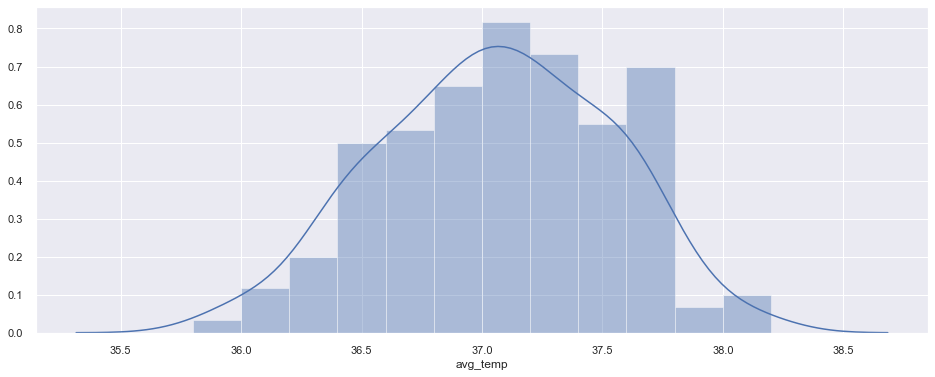

In [45]:
# Plot a historgram and kernel density estimate
sns.distplot(df.avg_temp)#, ax=axes[1, 1])

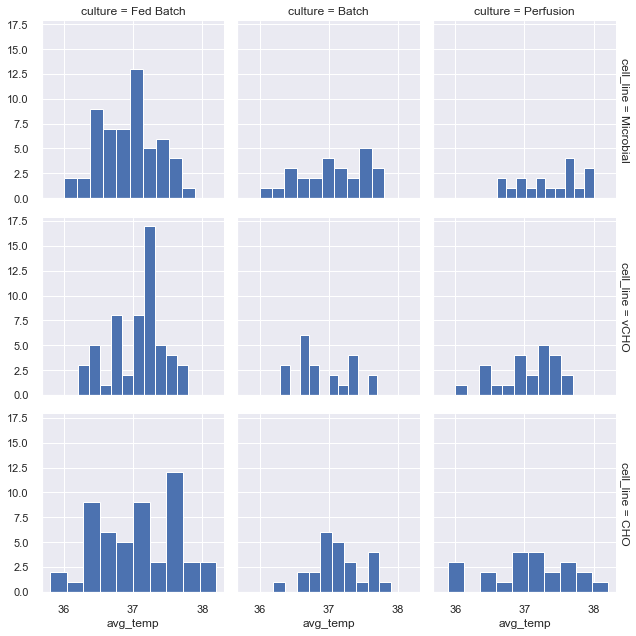

In [46]:
# Create a FacetGrid showing the temparture distributions for cell lines and cultures
g = sns.FacetGrid(df, row="cell_line", col="culture", margin_titles=True)
bins = 10
g.map(plt.hist, "avg_temp", bins=10)

We can see there is no difference between the different cell types or cultures which is to be expected.  

Let's check its correlations.

In [47]:
# Concatenate correlation coefficients [26]
feature = "avg_temp"
# Put all the correlation co-efficients together into one dataframe
dfTemp = pd.concat([cm[feature], cmMicro[feature], cmCHO[feature], cmvCHO[feature], 
                   cmBatch[feature], cmFedBatch[feature], cmPerf[feature]], axis=1)
# Rename the columns so we dn't get confused
dfTemp.columns = ["all", "microbial", "mammalian", "humanised", "batch", "fed_batch", "perfusion"]

In [48]:
# Show all the correlation co-efficients together
dfTemp

all  microbial  mammalian  humanised  batch  fed_batch  \
br_size      -0.02      -0.08      -0.03       0.05   0.08       0.02   
avg_temp      1.00       1.00       1.00       1.00   1.00       1.00   
avg_do       -0.01       0.05      -0.01      -0.11   0.10       0.01   
cell_density  0.10       0.25      -0.01       0.07  -0.02      -0.11   
time          0.05       0.22      -0.10       0.17   0.01       0.10   
alarm        -0.01       0.09      -0.09       0.01  -0.11      -0.02   
br_yield      0.03       0.06      -0.04       0.14   0.07      -0.05   
worth         0.03       0.14      -0.05       0.12  -0.15       0.15   

              perfusion  
br_size           -0.02  
avg_temp           1.00  
avg_do            -0.25  
cell_density       0.27  
time              -0.16  
alarm             -0.03  
br_yield           0.07  
worth             -0.08

No correlations are expected. The only influence temperature may have is on alarms and then even more loosely with the associated yield.

### 4.4 Average Dissolved Oxygen<a name="o"></a>

The average dissolved oxygen should have a normal distribution with no special considerations for either the cell line or culture type. The mean should be around 5.5mg/L but with a standard deviation of 0.5, but this will not be the actual case due to the use of a truncated normal distribution.

In [49]:
# Show actual mean and standard deviation for comparison with expected
df.avg_do.describe()

count    300.000000
mean       5.523667
std        0.482059
min        3.900000
25%        5.200000
50%        5.500000
75%        5.900000
max        6.700000
Name: avg_do, dtype: float64

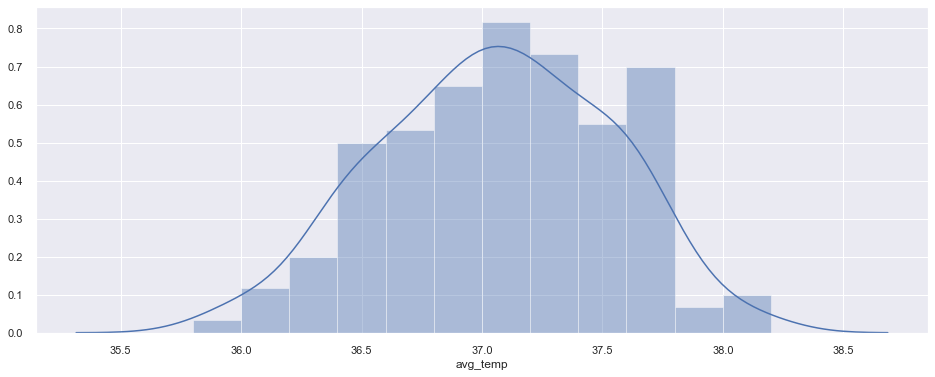

In [50]:
# Plot a historgram and kernel density estimate
sns.distplot(df.avg_temp)#, ax=axes[1, 1])

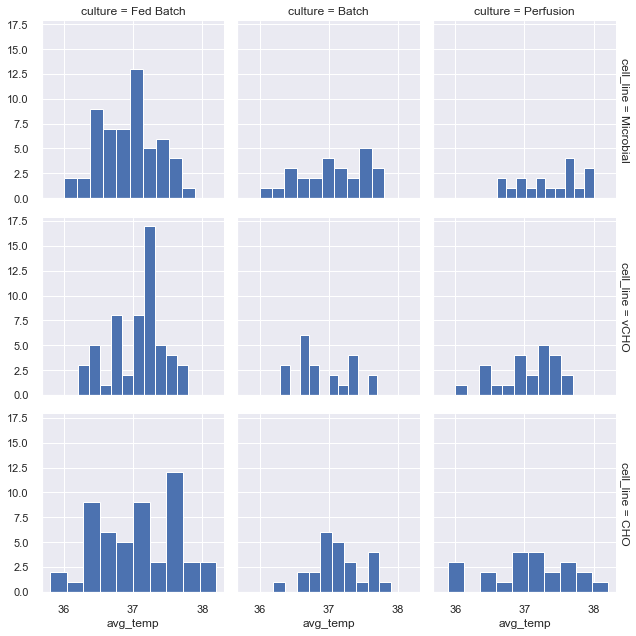

In [51]:
# Create a FacetGrid showing the temparture distributions for cell lines and cultures
g = sns.FacetGrid(df, row="cell_line", col="culture", margin_titles=True)
bins = 10
g.map(plt.hist, "avg_temp", bins=10)

We can see there is no difference between the different cell types or cultures which is to be expected.  

Let's check its correlations.

In [52]:
# Concatenate correlation coefficients [26]
feature = "avg_do"
# Put all the correlation co-efficients together into one dataframe
dfDo = pd.concat([cm[feature], cmMicro[feature], cmCHO[feature], cmvCHO[feature], 
                   cmBatch[feature], cmFedBatch[feature], cmPerf[feature]], axis=1)
# Rename the columns so we dn't get confused
dfDo.columns = ["all", "microbial", "mammalian", "humanised", "batch", "fed_batch", "perfusion"]

In [53]:
# Show all the correlation co-efficients together
dfDo

all  microbial  mammalian  humanised  batch  fed_batch  \
br_size      -0.07      -0.05      -0.05      -0.11  -0.11      -0.10   
avg_temp     -0.01       0.05      -0.01      -0.11   0.10       0.01   
avg_do        1.00       1.00       1.00       1.00   1.00       1.00   
cell_density -0.11      -0.11      -0.09       0.03  -0.25      -0.03   
time         -0.03      -0.14      -0.05      -0.09  -0.10      -0.06   
alarm        -0.08      -0.16      -0.16      -0.01  -0.19      -0.13   
br_yield     -0.03       0.03      -0.05       0.08  -0.15       0.05   
worth         0.02      -0.05      -0.04       0.05  -0.02       0.01   

              perfusion  
br_size            0.12  
avg_temp          -0.25  
avg_do             1.00  
cell_density      -0.22  
time               0.22  
alarm              0.14  
br_yield          -0.08  
worth              0.11

Similar to the average temperature readings, no correlations are expected. The only influence DO may have is on alarms and then even more loosely with the associated yield.

### 4.5 Culture type<a name="c"></a>
The culture type affects almost every aspect of this dataset and is discussed throughout with each other variable. For now we will just look at the counts for each.

In [54]:
# Get the counts per cell line for each culture type 
pieChart = df.culture.groupby(df.cell_line).value_counts()
pieChart

cell_line  culture  
CHO        Fed Batch    53
           Batch        25
           Perfusion    22
Microbial  Fed Batch    56
           Batch        26
           Perfusion    18
vCHO       Fed Batch    56
           Perfusion    23
           Batch        21
Name: culture, dtype: int64

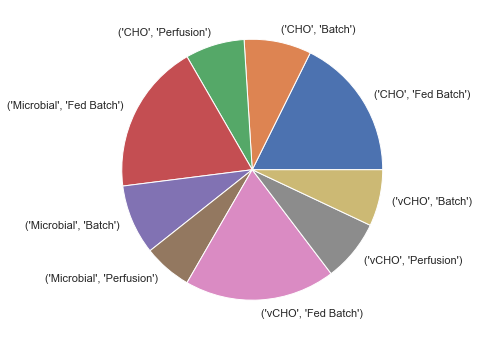

In [55]:
plt.pie(pieChart, labels=pieChart.index);

### 4.6 Peak Viable Cell Density<a name="cd"></a>

The peak viable cell density was simulated to have a mean of 4, 6 and 15 for batch, fed batch and perfusion cultures, a standard deviation of 1 for microbial and 2 for other cell lines and a multiplier of 4 was added to the microbial cell lines too.  

How did that work out in practise?

In [56]:
df.cell_density.groupby([df.cell_line, df.culture]).mean()

cell_line  culture  
CHO        Batch         3.560000
           Fed Batch     5.339623
           Perfusion    14.727273
Microbial  Batch        13.384615
           Fed Batch    21.428571
           Perfusion    57.333333
vCHO       Batch         3.952381
           Fed Batch     5.553571
           Perfusion    14.652174
Name: cell_density, dtype: float64

In [57]:
df.cell_density.groupby([df.cell_line, df.culture]).std()

cell_line  culture  
CHO        Batch        1.938212
           Fed Batch    1.640162
           Perfusion    2.207818
Microbial  Batch        4.924038
           Fed Batch    4.410142
           Perfusion    4.115966
vCHO       Batch        1.961535
           Fed Batch    1.867615
           Perfusion    2.102135
Name: cell_density, dtype: float64

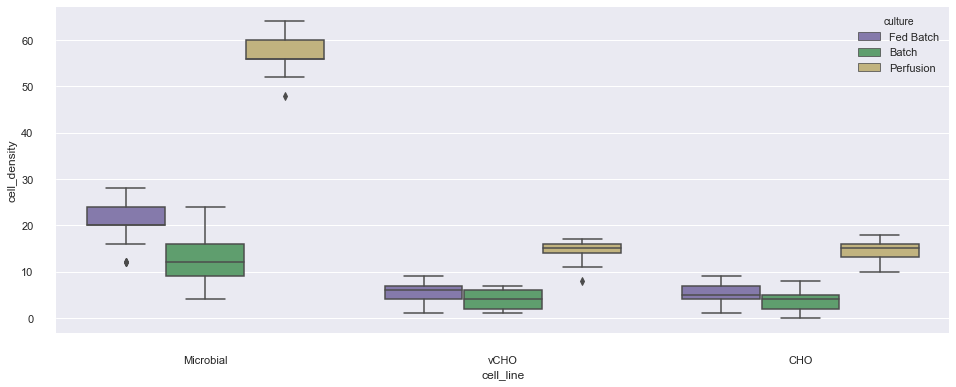

In [58]:
# Reset the fig size again
sns.set(rc={'figure.figsize':(16,6)})
# Do a boxplot of cell line against cell density separating out by the culture type
sns.boxplot(x="cell_line", y="cell_density", hue="culture", palette=["m", "g", "y"], data=df)
sns.despine(offset=10, trim=True)

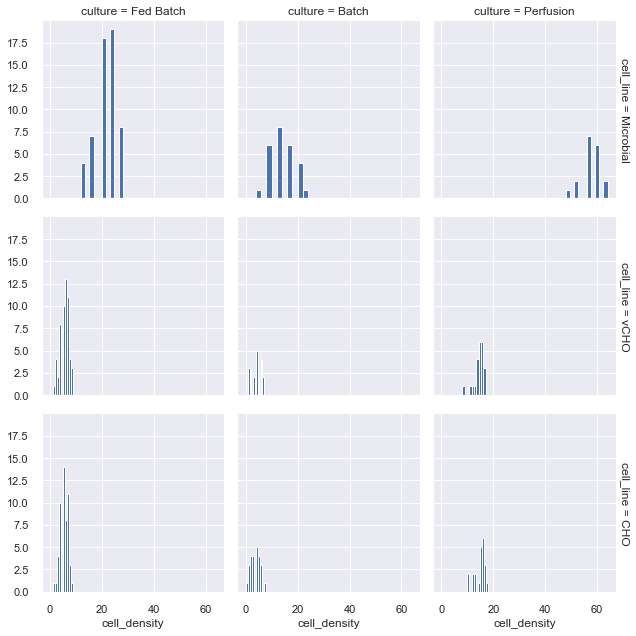

In [59]:
# Create a FacetGrid showing the cell density distributions for cell lines and cultures
g = sns.FacetGrid(df, row="cell_line", col="culture", margin_titles=True)
g.map(plt.hist, "cell_density")#, bins=10)

The boxplot above showed the difference between Perfusion > Fed Batch > Batch and Microbial > Non-Microbial cell densities.    

Let's check its correlations.

In [60]:
# Concatenate correlation coefficients [26]
feature = "cell_density"
# Put all the correlation co-efficients together into one dataframe
dfcd = pd.concat([cm[feature], cmMicro[feature], cmCHO[feature], cmvCHO[feature], 
                   cmBatch[feature], cmFedBatch[feature], cmPerf[feature]], axis=1)
# Rename the columns so we dn't get confused
dfcd.columns = ["all", "microbial", "mammalian", "humanised", "batch", "fed_batch", "perfusion"]

In [61]:
# Show all the correlation co-efficients together
dfcd

all  microbial  mammalian  humanised  batch  fed_batch  \
br_size      -0.18      -0.26      -0.30      -0.46   0.11      -0.05   
avg_temp      0.10       0.25      -0.01       0.07  -0.02      -0.11   
avg_do       -0.11      -0.11      -0.09       0.03  -0.25      -0.03   
cell_density  1.00       1.00       1.00       1.00   1.00       1.00   
time         -0.02       0.65       0.62       0.50  -0.32      -0.54   
alarm        -0.01       0.25       0.33       0.17  -0.06      -0.28   
br_yield      0.55       0.30       0.47       0.42   0.70       0.74   
worth        -0.00       0.52       0.52       0.52  -0.12      -0.33   

              perfusion  
br_size            0.03  
avg_temp           0.27  
avg_do            -0.22  
cell_density       1.00  
time              -0.54  
alarm             -0.19  
br_yield           0.43  
worth             -0.36

Looking at all the dataset, the cell density show the best correlation with the yield which is to be expected. There may be a tendency towards a negative correlation with the bioreactor size as previously discussed.  

It is interesting to note that there is good enough correlation with the worth also, but only when broken down via cell line. There is no such correlation on the total or the culture type values.  

As expected there is no correlation with DO or temperature readings.

### 4.7 Processing Time<a name="h"></a>

These values were simulated differently depending on bioreactor size, cell line and culture method. Lets see how that translated to the actual dataset produced. 

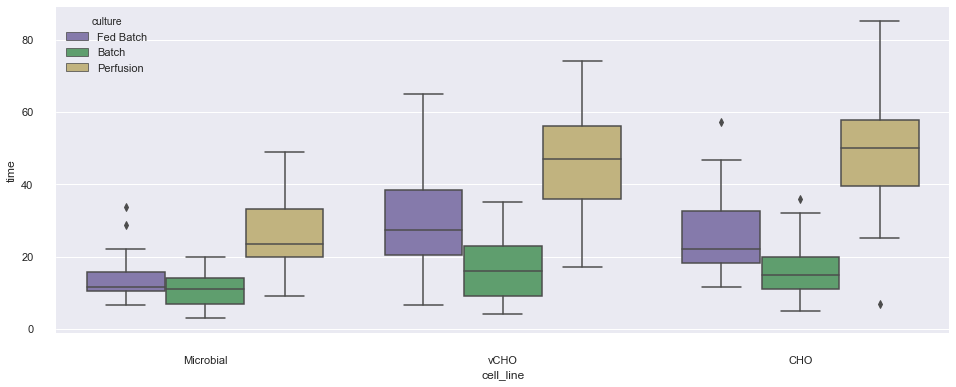

In [62]:
# Reset the fig size again
sns.set(rc={'figure.figsize':(16,6)})
# Do a boxplot of cell line against time separating out by the culture type
sns.boxplot(x="cell_line", y="time", hue="culture", palette=["m", "g", "y"], data=df)
sns.despine(offset=10, trim=True)

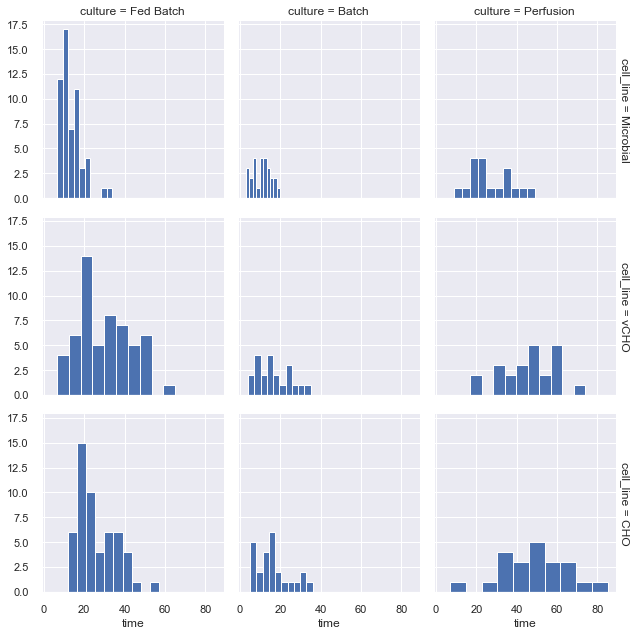

In [63]:
# Create a FacetGrid showing the time distributions for cell lines and cultures
g = sns.FacetGrid(df, row="cell_line", col="culture", margin_titles=True)
g.map(plt.hist, "time")#, bins=10)

The plots above show the batch < fed batch < perfusion increase in the mean times. There is much overlap with perfusion due to the volume of perfusion values - perfusion being the most popular culture method.  

The second set of plot in particular show the reduced time for microbial cultures.  

Let's check the correlations.

In [64]:
# Concatenate correlation coefficients [26]
feature = "time"
# Put all the correlation co-efficients together into one dataframe
dfTime = pd.concat([cm[feature], cmMicro[feature], cmCHO[feature], cmvCHO[feature], 
                   cmBatch[feature], cmFedBatch[feature], cmPerf[feature]], axis=1)
# Rename the columns so we dn't get confused
dfTime.columns = ["all", "microbial", "mammalian", "humanised", "batch", "fed_batch", "perfusion"]

In [65]:
# Show all the correlation co-efficients together
dfTime


all  microbial  mammalian  humanised  batch  fed_batch  \
br_size       0.17       0.19       0.20       0.23   0.55       0.52   
avg_temp      0.05       0.22      -0.10       0.17   0.01       0.10   
avg_do       -0.03      -0.14      -0.05      -0.09  -0.10      -0.06   
cell_density -0.02       0.65       0.62       0.50  -0.32      -0.54   
time          1.00       1.00       1.00       1.00   1.00       1.00   
alarm         0.48       0.38       0.45       0.47   0.24       0.46   
br_yield      0.07       0.56       0.61       0.47  -0.05      -0.27   
worth         0.61       0.79       0.70       0.54   0.45       0.64   

              perfusion  
br_size            0.41  
avg_temp          -0.16  
avg_do             0.22  
cell_density      -0.54  
time               1.00  
alarm              0.36  
br_yield           0.20  
worth              0.59

Looking at all the dataset, the cell density shows some correlation with the size, alarms and the worth. The correlation with size is least pronounced with the perfusion culture method. It is interesting that the cell density is negatively correlated with time in perfusion culture. This on first inspection may appear a little unexpected in that being perfusion both the time and cell densities are increased from the normal. Apparently the rate of increase of the time is much greater than the rate of increase of the cell density. This in hindsight makes sense as the is only a finite cell density achievable in a bioreactor. In perfusion cultures, this increased cell density is sustained for a longer period to produce more product. So, like with bioreactor size, the cell density stays constant regardless of increasing time spent in the bioreactor.  

There is some correlation to be found with the alarm number also. This is again to be expected given the Poisson distribution and time multiplier on that distribution.  

There is correlation to be found in the yield and worth values also. With the yield, this is more pronounced when you split the dataset into the cell lines, while the worth is true regardless of cell lines or culture method. This is because of the premise, the longer the culture takes the more expensive it is to produce. One might expect a better correlation with the perfusion time and yield also as this is a multiplier in to its calculation. The absence or reduction of this correlation coefficient may be due in part to the competing influences of the reduced bioreactor size with increased times.

As expected there is no correlation with DO or temperature readings.

### 4.8 No of alarms<a name="a"></a>

These values were simulated using a Poisson distribution and a multiplier for the time in the bioreactor. There was also some influence of increased / decreased temperature and DO readings. Lets see how that translated to the actual dataset produced. 

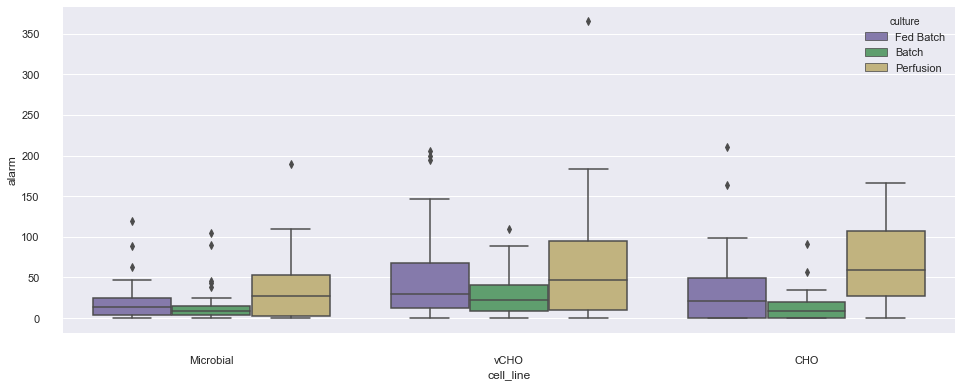

In [66]:
# Reset the fig size again
sns.set(rc={'figure.figsize':(16,6)})
# Do a boxplot of cell line against the alarms separating out by the culture type
sns.boxplot(x="cell_line", y="alarm", hue="culture", palette=["m", "g", "y"], data=df)
sns.despine(offset=10, trim=True)

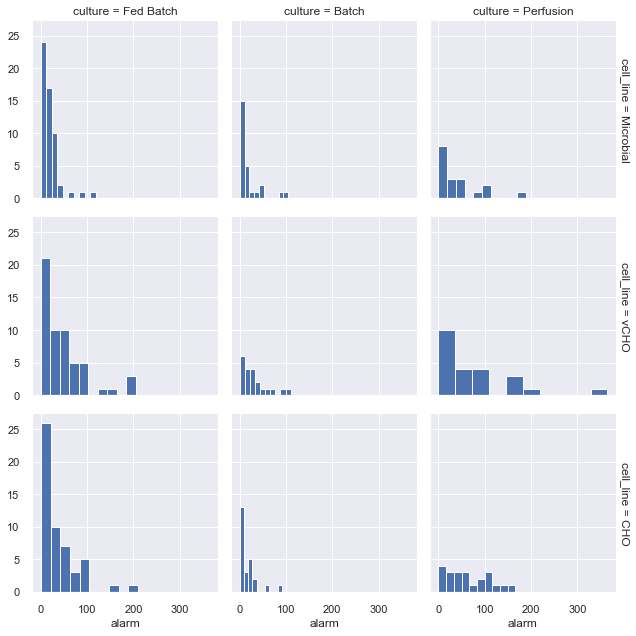

In [67]:
# Create a FacetGrid showing the alarm distributions for cell lines and cultures
g = sns.FacetGrid(df, row="cell_line", col="culture", margin_titles=True)
g.map(plt.hist, "alarm")#, bins=10)

The plots above show the increased number of alarms in perfusion cultures which is to be expected.  

Let's check the correlations.

In [68]:
# Concatenate correlation coefficients [26]
feature = "alarm"
# Put all the correlation co-efficients together into one dataframe
dfAlarm = pd.concat([cm[feature], cmMicro[feature], cmCHO[feature], cmvCHO[feature], 
                   cmBatch[feature], cmFedBatch[feature], cmPerf[feature]], axis=1)
# Rename the columns so we dn't get confused
dfAlarm.columns = ["all", "microbial", "mammalian", "humanised", "batch", "fed_batch", "perfusion"]

In [69]:
# Show all the correlation co-efficients together
dfAlarm


all  microbial  mammalian  humanised  batch  fed_batch  \
br_size       0.14       0.16       0.10       0.20   0.23       0.27   
avg_temp     -0.01       0.09      -0.09       0.01  -0.11      -0.02   
avg_do       -0.08      -0.16      -0.16      -0.01  -0.19      -0.13   
cell_density -0.01       0.25       0.33       0.17  -0.06      -0.28   
time          0.48       0.38       0.45       0.47   0.24       0.46   
alarm         1.00       1.00       1.00       1.00   1.00       1.00   
br_yield     -0.17      -0.18       0.08      -0.11  -0.25      -0.32   
worth         0.10      -0.04       0.18      -0.02  -0.22      -0.01   

              perfusion  
br_size            0.31  
avg_temp          -0.03  
avg_do             0.14  
cell_density      -0.19  
time               0.36  
alarm              1.00  
br_yield          -0.16  
worth             -0.03

Looking at all the dataset, the alarms show the greatest (and only) coefficient of correlation with time. This is totally as would be expected - with an increased duration there is increased probability of alarms being generated. There is weak negative correlation with the yield, which again would tally with the simulation  a greater number of alarms means the batch was operating less inside the expected limits. This being the case, it is unlikely they would achieve the optimum yields.  

In the data simulated at the time of writing, there is a negative correlation value against the temperature. While there is a relationship between the temperature and alarms it is based on how far away the average temperature is away from the mean temperature. This could be above or below therefore the negative correlation could be a positive one the next run. This is further enhanced by the observation that almost the same relationship exists with the DO measurements which exhibits a positive correlation (weak again). Although when I say almost the same relationship, this is due to the fact that the DO was simulated using a truncated normalised dataset which was capped at 6.7mg/L. This would skew an alarm effects the DO may have to be as a result of a lower reading and therefore make a positive correlation between DO value and number of alarms.

### 4.9 Yield <a name="y"></a>
The yield is calculated according to cell line, taking into account of the number of alarms generated, the cell density, the bioreactor size and in the case of perfusion - the time taken to produce the product. This has so many contributing factors in its make-up it will be interesting to see if any of them are evident in the resultant data.

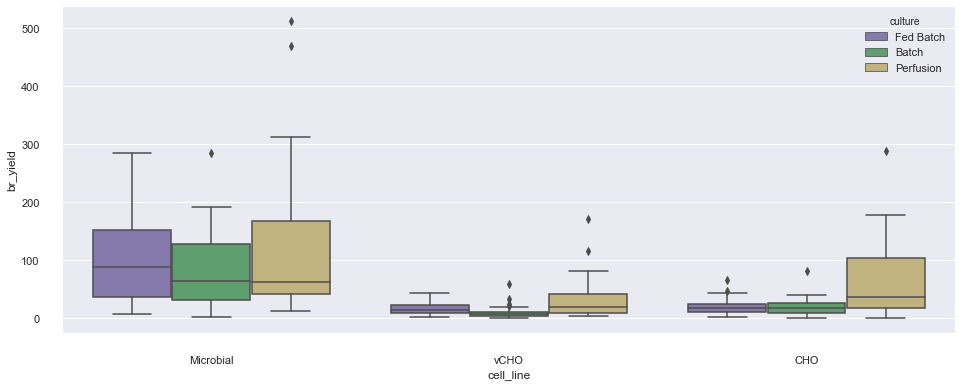

In [70]:
# Reset the fig size again
sns.set(rc={'figure.figsize':(16,6)})
# Do a boxplot of cell line against the alarms separating out by the culture type
sns.boxplot(x="cell_line", y="br_yield", hue="culture", palette=["m", "g", "y"], data=df)
sns.despine(offset=10, trim=True)

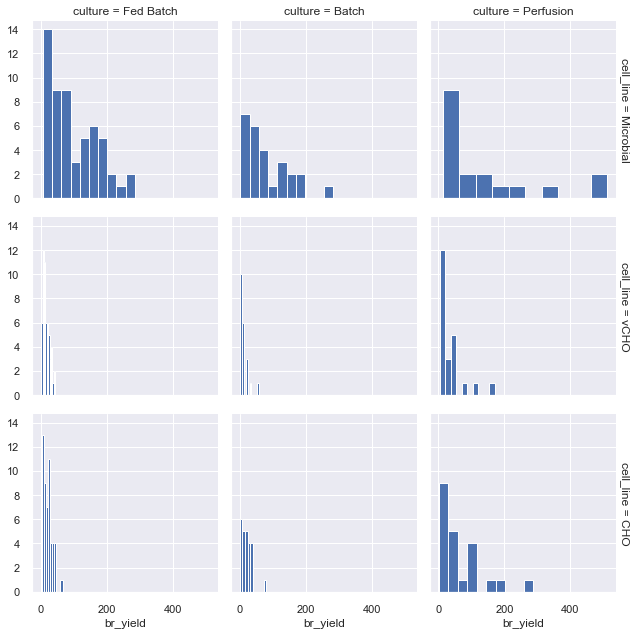

In [71]:
# Create a FacetGrid showing the yield distributions for cell lines and cultures
g = sns.FacetGrid(df, row="cell_line", col="culture", margin_titles=True)
g.map(plt.hist, "br_yield")#, bins=10)

In [72]:
# Concatenate correlation coefficients [26]
feature = "br_yield"
# Put all the correlation co-efficients together into one dataframe
dfYield = pd.concat([cm[feature], cmMicro[feature], cmCHO[feature], cmvCHO[feature], 
                   cmBatch[feature], cmFedBatch[feature], cmPerf[feature]], axis=1)
# Rename the columns so we dn't get confused
dfYield.columns = ["all", "microbial", "mammalian", "humanised", "batch", "fed_batch", "perfusion"]

In [73]:
# Show all the correlation co-efficients together
dfYield


all  microbial  mammalian  humanised  batch  fed_batch  \
br_size       0.31       0.50       0.33       0.16   0.48       0.33   
avg_temp      0.03       0.06      -0.04       0.14   0.07      -0.05   
avg_do       -0.03       0.03      -0.05       0.08  -0.15       0.05   
cell_density  0.55       0.30       0.47       0.42   0.70       0.74   
time          0.07       0.56       0.61       0.47  -0.05      -0.27   
alarm        -0.17      -0.18       0.08      -0.11  -0.25      -0.32   
br_yield      1.00       1.00       1.00       1.00   1.00       1.00   
worth         0.21       0.77       0.95       0.94  -0.05      -0.17   

              perfusion  
br_size            0.58  
avg_temp           0.07  
avg_do            -0.08  
cell_density       0.43  
time               0.20  
alarm             -0.16  
br_yield           1.00  
worth              0.27

Looking at all the dataset, the yield showed the highest correlation with the worth - but only for the cell lines, not for the culture type or for the total dataset. This is in harmony with the way the data was simulated as the worth was calculated from the yield with a multiplier specific to each cell line and time / bioreactor size considerations. 

### 4.10 Net worth of batch <a name="w"></a>
Biopharmaceuticals are an expensive commodity [[16](#16)] used to treat many different diseases. According to the Australian Government [[19](#19)] the Dec 2019 average cost per gram of (a subset of 32) biopharmaceuticals was just over AU\\$60K.  

This broke down to:  
* Microbial: min AU\\$6.14; max AU\\$3207; mean AU\\$911
* Mammalian: min AU\\$1833; max AU\\$607479; mean AU\\$44913
* Humanised: min AU\\$1019; max AU\\$949500; mean: AU\\$127602

The reason for the big spread of microbial prices is due to the nature of products produced from the lower value anitbiotics to the higher end mAb fragments [[14](#14)].  

The humanised average is skewed heavily to the right due to a single outlier, Lemtrada, used to treat CLL and MS which worked out at close to one million dollars per gram.  

Similarly, the mammalian average is skewed to the right due to Lucentis, priced at over AU\\$600,000 per gram.

For the purposes of this simulation, we will exclude the two outliers from the mammaial and humanised price lists and base all other pricing on a uniform distribution per cell line as follows:  
* Microbial: 
    - Min AU\\$6  
    - Max AU\\$3207
* Mammalian:  
    - Min AU\\$1833
    - Max AU\\$37046
* Humanised:
    - Min AU\\$1019
    - Max AU\\$110367  

Then we will sort the price per g in descending order and match it to a temporary field in dataframe corresponding to the time spent processing / size of bioreactor. We are doing this as we are assuming that if you take away the larger bioreactor size from the equation, the longer time spent means that the product is worth such linger processing times. 

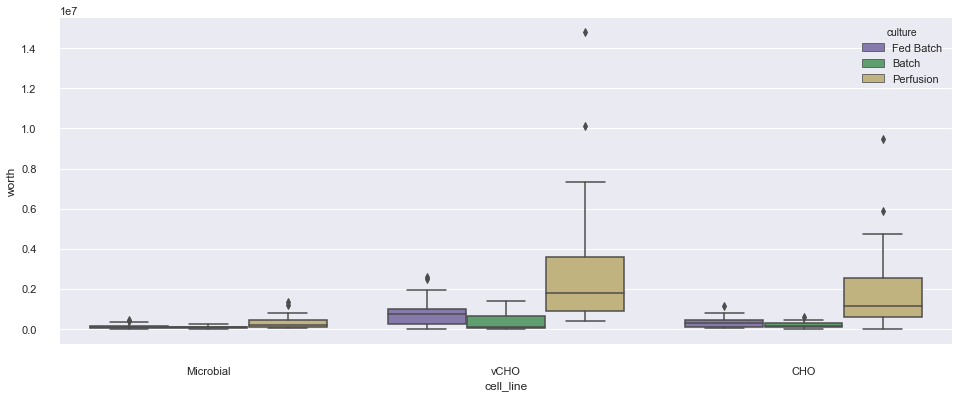

In [74]:
# Reset the fig size again
sns.set(rc={'figure.figsize':(16,6)})
# Do a boxplot of cell line against the worth separating out by the culture type
sns.boxplot(x="cell_line", y="worth", hue="culture", palette=["m", "g", "y"], data=df)
sns.despine(offset=10, trim=True)

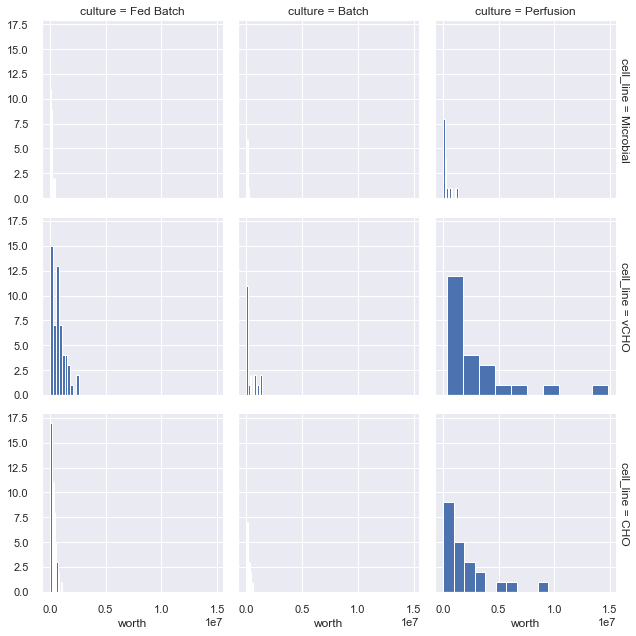

In [75]:
# Create a FacetGrid showing the worht distributions for cell lines and cultures
g = sns.FacetGrid(df, row="cell_line", col="culture", margin_titles=True)
g.map(plt.hist, "worth")#, bins=10)

The outliers in theses plots make any analysis based on them uncertain. The only obvious finding from these graphs are the fact that the humanised products are worth a lot more than the microbial and mammalian. It is hard to differentiate between the other cell lines given the scale of the plot to account for outliers.

Let's check the correlations.

In [76]:
# Concatenate correlation coefficients [26]
feature = "worth"
# Put all the correlation co-efficients together into one dataframe
dfWorth = pd.concat([cm[feature], cmMicro[feature], cmCHO[feature], cmvCHO[feature], 
                   cmBatch[feature], cmFedBatch[feature], cmPerf[feature]], axis=1)
# Rename the columns so we dn't get confused
dfWorth.columns = ["all", "microbial", "mammalian", "humanised", "batch", "fed_batch", "perfusion"]

In [77]:
# Show all the correlation co-efficients together
dfWorth


all  microbial  mammalian  humanised  batch  fed_batch  \
br_size       0.02       0.07       0.15      -0.04  -0.01       0.18   
avg_temp      0.03       0.14      -0.05       0.12  -0.15       0.15   
avg_do        0.02      -0.05      -0.04       0.05  -0.02       0.01   
cell_density -0.00       0.52       0.52       0.52  -0.12      -0.33   
time          0.61       0.79       0.70       0.54   0.45       0.64   
alarm         0.10      -0.04       0.18      -0.02  -0.22      -0.01   
br_yield      0.21       0.77       0.95       0.94  -0.05      -0.17   
worth         1.00       1.00       1.00       1.00   1.00       1.00   

              perfusion  
br_size            0.43  
avg_temp          -0.08  
avg_do             0.11  
cell_density      -0.36  
time               0.59  
alarm             -0.03  
br_yield           0.27  
worth              1.00

Looking at all the dataset, unsurprisingly the worth shows highest correlation with the yield with respect to the cell lines - not so much with the culture methods. 

## <a name="conclusion"></a>5. Conclusion

Simulation of a dataset was a challenging assignment designed to make you think about data from a different perspective - the actual generation part. I chose the bioreactor as no such dataset exists and I thought it would be interesting to simulate. Running through the simulation many times I needed to tweak many of the multipliers and factors to ensure the results are meaningful. I think the data generated makes sense, including the insane values of each batch - some might say they are even low values.  

It was a great exercise to try and figure out relationships between the variables in the real world and decide how best to replicate them in the simulated environment. Being a natural organic process, the default distribution was of course the normal distribution, but as I progressed I discovered some compensations had to be made to make the data more realistic _e.g._ no negative values, hard upper limits for physical phenomenon etc. so I had to use a truncated normalised distribution in many instances. 

Doing a brief analysis of the resultant dataset to actual observe the fabricated relationships was a good validation of the simulation.  It brought home how by slicing the data in different ways can show relationship previously hidden - a useful piece of knowledge for anyone in the field. 

In the future I would like to see how well predictions could be made on the dataset, particularly on the yield or if a model could be made to classify the cell line or culture types. I would also like to add a few more variables into the mix too including cell growth rates _etc._ and I would like to do a better distribution of the costs to find the worth of each batch. Maybe another classification variable on the use of the biopharmaceutical would better enable this to happen.

Just one last final thought - the simulation of the dataset brought a new perspective into any analysis I may perform in the future. I thought it was an excellent task to set a student and I found it a valuable learning experience.

###### <a name="refs"></a>6. References ##
1. [NumPy Site](http://www.numpy.org/)  <a name = "1"></a>  
2. [Project Jupyter](http://jupyter.org/) <a name = "2"></a>  
3. [I. Watanabe , S. Okada Effects of Temperature on Growth Rate of Cultured Mammalian Cells (L5178Y), J Cell Biol (1967) 32 (2): 309-323](http://jcb.rupress.org/content/jcb/32/2/309.full.pdf)<a name = "3"></a>  
4. [Felipe Tapia, Daniel Vázquez-Ramírez, Yvonne Genzel, Udo Reichl  Bioreactors for high cell density and continuous multi-stage cultivations: options for process intensification in cell culture-based viral vaccine production, Appl Microbiol Biotechnol. 2016; 100: 2121–2132. Published online 2016 Jan 13. doi: 10.1007/s00253-015-7267-9](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4756030/) <a name = "4"></a>  
5. [GE Life Sciences: 7 Factors that Affect Oxygen Transfer](https://www.gelifesciences.com/en/us/solutions/bioprocessing/knowledge-center/7-factors-that-affect-oxygen-transfer-to-cells-in-bioreactors) <a name = "5"></a>  
6. [Python and R Tips: How To Loop Through Pandas Rows? or How To Iterate Over Pandas Rows?](https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/) <a name = "6"></a>  
7. [Brooks Instrument - Boosting Bioreactor Performance by Enhancing MFC accuracy](https://www.brooksinstrument.com/en/blog/boosting-bioreactor-performance-by-enhancing-mfc-accuracy)<a name = "7"></a>  
8. [Wikipedia - Chinese Hamster Ovary Cell](https://en.wikipedia.org/wiki/Chinese_hamster_ovary_cell)<a name = "8"></a>   
9. [Stack Overflow: How to Make Two Plots Side by Side](https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python)<a name = "9"></a>  
10. [Stack Overflow: Shuffle Dataframe Rows](https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows) <a name = "10"></a>  
11. [Scipy Docs: Z-Scores](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.zscore.html)<a name = "11"></a>  
12. [Geeks for Geeks: Python Converting all Strings in List to Integers](https://www.geeksforgeeks.org/python-converting-all-strings-in-list-to-integers/)<a name = "12"></a>  
13. Trevor J. Marshall, Yvonne A. Brady, Chapter 30 - Process Control and Automation Solutions, Editor(s): Günter Jagschies, Eva Lindskog, Karol Łącki, Parrish Galliher, Biopharmaceutical Processing, Elsevier, 2018, Pages 579-621 <a name = "13"> </a>  
14. [Spadiut O, Capone S, Krainer F, Glieder A, Herwig C. Microbials for the production of monoclonal antibodies and antibody fragments. Trends Biotechnol. 2014;32(1):54–60. doi:10.1016/j.tibtech.2013.10.002](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3906537/) <a name = "14"> </a>  
15. [Kelley B. Industrialization of mAb production technology: the bioprocessing industry at a crossroads. MAbs. 2009;1(5):443–452. doi:10.4161/mabs.1.5.9448](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2759494/) <a name = "15"></a>  
16. [Inmaculada Hernandez, PharmD, PhD; Samuel W. Bott, BS; Anish S. Patel, BS; Collin G. Wolf, BS; Alexa R. Hospodar, BS;
Shivani Sampathkumar, BS; and William H. Shrank, MD, Pricing of Monoclonal Antibody Therapies: Higher If Used for Cancer? MSHSAm J Manag Care. 2018;24(2):109-112](https://ajmc.s3.amazonaws.com/_media/_pdf/AJMC_02_2018_Hernandez%20final.pdf) <a name ="16"></a>  
17. [Ou J, Si Y, Goh K, Yasui N, Guo Y, Song J, et al. (2018) Bioprocess development of antibody-drug conjugate production for cancer treatment. PLoS ONE 13(10): e0206246](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0206246) <a name ="17"></a>  
18. [Dario Radečić, Towards Data Science: Top 3 Pandas Functions You Don't Know About Probably](https://towardsdatascience.com/top-3-pandas-functions-you-dont-know-about-probably-5ae9e1c964c8) <a name ="18"></a>  
19. [Pbs.gov.au. (2019). Pharmaceutical Benefits Scheme (PBS) | Ex-manufacturer price. [online] Available at: http://www.pbs.gov.au/info/industry/pricing/ex-manufacturer-price [Accessed 9 Dec. 2019].](http://www.pbs.gov.au/industry/pricing/ex-manufacturer-price/2019/ex-manufactrer-prices-non-efc-2019-12-02.XLSX) <a name ="19"></a>  
20. [Gilman, A., Laurens, L.M., Puri, A.W. et al. Bioreactor performance parameters for an industrially-promising methanotroph Methylomicrobium buryatense 5GB1. Microb Cell Fact 14, 182 (2015) doi:10.1186/s12934-015-0372-8](https://microbialcellfactories.biomedcentral.com/articles/10.1186/s12934-015-0372-8) <a name ="20"></a>  
21. [Diego A. Suarez-Zuluaga, Daniel Borchert, Nicole N. Driessen, Wilfried A.M. Bakker, Yvonne E. Thomassen, Accelerating bioprocess development by analysis of all available data: A USP case study, Vaccine, Volume 37, Issue 47, 2019, Pages 7081-7089](https://www.sciencedirect.com/science/article/pii/S0264410X1930917X)<a name ="21"></a>   
22. [Gilman, Alexey, Laurens, Lieve M., Puri, Aaron W., Chu, Frances, Pienkos, Philip T., and Lidstrom, Mary E. Bioreactor Performance Parameters for an Industrially-Promising Methanotroph Methylomicrobium buryatense 5GB1. United States: N. p., 2015. Web. doi:10.1186/s12934-015-0372-8.](https://www.osti.gov/pages/biblio/1233686)<a name ="22"></a>  
23. [Weiqi Fu, Steinn Gudmundsson, Kristine Wichuk, Sirus Palsson, Bernhard O. Palsson, Kourosh Salehi-Ashtiani, Sigurður Brynjólfsson, Dataset on economic analysis of mass production of algae in LED-based photobioreactors, Data in Brief, Volume 22, 2019, Pages 137-139, ISSN 2352-3409](https://www.sciencedirect.com/science/article/pii/S235234091831549X)<a name ="23"></a>  
24. [Intellipaat: How to Get a Normal Distribution Within a Range in numpy](https://intellipaat.com/community/9496/how-to-get-a-normal-distribution-within-a-range-in-numpy)<a name ="24"></a>  
25. [Code Burst: 2 Important Staistics Terms You Need to KNow in Data Science](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa)<a name ="25"></a>  
26. [Pandas PyData: Pandas Concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)<a name ="26"></a>  

### End